In [25]:
import torch as tr

if tr.backends.mps.is_available():
    device = tr.device("mps")
    x = tr.ones(1, device=device)
    print (x)
elif tr.cuda.is_available():
    device = tr.device("cuda")
    x = tr.ones(1, device=device)
    print (x)
else:
    print ("MPS or cuda device not found.")

from GP import *
import torch as tr
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from puwr import *
import torchinterp1d

import scipy.integrate as integrate
from torch.special import gammaln
#from orthogonal_poly import legendre_01

from torch.autograd.functional import hessian

import scipy.integrate as integrate

import h5py as h5

# import all packages and set plots to be embedded inline
import numpy as np 
import datetime
from scipy.optimize import minimize 
from scipy import special 
from scipy.optimize import Bounds 
from scipy.linalg import cho_solve 
#from pyDOE import lhs 
import time
#load all the Models and Kernels
from functions import *
import pylab as py


import matplotlib as mpl

import os
os.environ["PATH"] = "/sciclone/home/yacahuanamedra/texlive/bin/x86_64-linux:" + os.environ["PATH"]

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{amsfonts} \usepackage{braket}')
import pickle


from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

mpl.rc('font', **font)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

mpl.rc('font', **font)

MPS or cuda device not found.


In [2]:
import numpy as np

z = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

m005 = np.array([
    0.03765099114673576 - 0.1313459083672451j,
    0.03710302482132123 - 0.15035024618046366j,
    0.030555363604935964 - 0.14418670221480892j,
    0.020567912422309993 - 0.11184024492647407j,
    0.007203985199363577 - 0.055980818439415644j,
    -4.095423999928016e-11 + 1.479640347303357e-12j,
    -0.014125625537839442 + 0.055906648710405106j,
    -0.021730790264268548 + 0.1117601684828938j,
    -0.030541364058318813 + 0.14412528587511297j,
    -0.03690700753630449 + 0.15033103002156123j,
    -0.03754123786236527 + 0.1313914110788476j
])
m025 = np.array([
    -0.0006529736942191841 + 0.0014788782230839449j,
    -0.00045070541974301034 + 0.0025647712831604j,
    -0.00039726623610871273 + 0.0039102214464882615j,
    -0.00039956997331957317 + 0.005262549217070547j,
    -0.00030920131617621915 + 0.005704813035940698j,
    -1.7071899449661032e-12 + 3.303189990428466e-13j,
    -0.00027634163344646134 - 0.006164134653723452j,
    -0.00024839196083146706 - 0.005812044787609154j,
    -8.392938838735695e-05 - 0.004242308783041875j,
    0.00018106712000518508 - 0.0027856781695668117j,
    0.0005046996076131858 - 0.0016006231851366627j
])
m014 = np.array([
    0.02145455468618622 - 0.11022824586072055j,
    0.025917420762449756 - 0.13978776699195986j,
    0.02279525289067724 - 0.14456229053124636j,
    0.01563874872143378 - 0.11908897863080772j,
    0.006087476038770703 - 0.06434303556240677j,
    -1.2548186933969419e-09 + 8.384043763498542e-13j,
    -0.010155433390890894 + 0.06413837722848152j,
    -0.016540210552966714 + 0.11880015314937044j,
    -0.022865762191370483 + 0.14448718749814923j,
    -0.02590966017039808 + 0.13967801717903292j,
    -0.021514718404143283 + 0.11012382480249841j
])
m016 = np.array([
    0.0020955513411522204 - 0.009744868233783848j,
    0.002753304924875739 - 0.012240061324191635j,
    0.0025133402285452376 - 0.01228398916403746j,
    0.0018273313014850884 - 0.009358232171557603j,
    0.0010819354088108385 - 0.004056936117824164j,
    2.4872139903209245e-09 - 6.900943873797994e-13j,
    -0.00112552686407498 + 0.003550051059556636j,
    -0.0022578606065800644 + 0.008729262937063616j,
    -0.00284643316796151 + 0.01190275436998322j,
    -0.002971082668046212 + 0.012000637834120354j,
    -0.0022123435268748045 + 0.009586515693153571j
])
MH=0.4170251259201194
m005=(m005+m005[::-1].conjugate())/2.0
m025=(m025+m025[::-1].conjugate())/2.0
m014=(m014+m014[::-1].conjugate())/2.0
m016=(m016+m016[::-1].conjugate())/2.0

m005_Re, m005_Im = m005.real, m005.imag
m025_Re, m025_Im = m025.real, m025.imag
m014_Re, m014_Im = m014.real, m014.imag
m016_Re, m016_Im = m016.real, m016.imag

error = 0.000001 
m005_Re_err= error*np.ones_like(m005_Re)
m005_Im_err= error*np.ones_like(m005_Im)
m025_Re_err= error*np.ones_like(m025_Re)
m025_Im_err= error*np.ones_like(m025_Im)
m014_Re_err= error*np.ones_like(m014_Re)
m014_Im_err= error*np.ones_like(m014_Im)
m016_Re_err= error*np.ones_like(m016_Re)
m016_Im_err= error*np.ones_like(m016_Im)

In [2]:
N = 44
num_flavor = 2
m1 = 0.05
m2 = 0.25
g = 0.20
hadron_data_string_1_44 = """
0.0017328743296496727 - 0.04714191992261476im
0.0008738129670343795 - 0.08033543278394104im
-0.006796275665850934 - 0.10025975642151286im
-0.02427610384029616 - 0.08518916998464522im
-0.07598565706763896 - 0.01566496298853542im
1.0000000037311931 - 4.606481784835982e-15im
-0.07778825064578121 + 0.014852176033741147im
-0.027655067401481173 + 0.08408080537946556im
-0.01381606814798595 + 0.09941869538848391im
-0.009295933916621573 + 0.07973932758134046im
-0.005014391212510025 + 0.04670917583650699im
"""
vacuum_data_string_1_44 = """
-0.003420901861782256 + 0.004402625606188255im
-0.0049458992973189725 + 0.009548009674816995im
-0.010306459925746757 + 0.018348096754835425im
-0.02530714582787019 + 0.034714208671530286im
-0.07401516408501939 + 0.062184634223946864im
1.0000000000593052 - 2.1864208619499943e-12im
-0.07388908562330179 - 0.062169138889899195im
-0.02484125473383012 - 0.034826233109765244im
-0.009559242092866925 - 0.018277875192697496im
-0.0033966078548476014 - 0.009507415675467113im
6.202430780438895e-5 - 0.00442366549153132im
"""
hadron_data_string_2_44 = """
-0.002132529644314081 + 0.00137350065211243im
-0.003784006447201175 + 0.0035169074744073937im
-0.008888553500113618 + 0.007656714735888834im
-0.023218242734813863 + 0.017992145889582863im
-0.07187062255039857 + 0.042343492236786656im
1.000000001808198 - 1.90523266503006e-12im
-0.07319090040580646 - 0.04339375866819526im
-0.0243032254497367 - 0.01921502233839867im
-0.009829261678033614 - 0.008668226454486208im
-0.003796875270820845 - 0.004181220737014008im
-0.0007462651039639918 - 0.0018409533688198269im
"""
vacuum_data_string_2_44 = """
-0.00199394252832593 + 0.001983587454897245im
-0.003723077128796966 + 0.005151571898650898im
-0.008988068296018 + 0.011402709479417836im
-0.02395620377126334 + 0.02474457371742366im
-0.07409411926767775 + 0.05045179766130324im
0.9999999997361859 - 1.7511507763573968e-12im
-0.07405850832999941 - 0.05046244941178825im
-0.023795793978993403 - 0.02467955723837901im
-0.008864909639549197 - 0.011454113275482885im
-0.003290795533780884 - 0.005191357293548638im
-0.0006453513279805851 - 0.0020763627969756482im
"""


import numpy as np
import re

def parse_complex_string(data_string):
    complex_numbers = []
    for line in data_string.strip().split("\n"):
        # Replace 'im' with 'j'
        line = line.replace("im", "j")
        # Remove spaces before + or - in the imaginary part
        line = re.sub(r'\s*([+-])\s*', r'\1', line)
        # Convert to complex
        complex_numbers.append(complex(line))
    return np.array(complex_numbers, dtype=np.complex128)

# Convert all datasets
m_05_44 = parse_complex_string(hadron_data_string_1_44)- parse_complex_string(vacuum_data_string_1_44)
m_25_44 = parse_complex_string(hadron_data_string_2_44)- parse_complex_string(vacuum_data_string_2_44)
#print("m_05:", m_05_44)
MH_44=0.6904856604909035
m_05_44=(m_05_44+m_05_44[::-1].conjugate())/2.0
m_25_44=(m_25_44+m_25_44[::-1].conjugate())/2.0

m_05_Re_44, m_05_Im_44 = m_05_44.real, m_05_44.imag
m_25_Re_44, m_25_Im_44 = m_25_44.real, m_25_44.imag

z_44=np.linspace(-5, 5, 11)
print("z 44", z_44)

N = 84
num_flavor = 2
m1 = 0.05
m2 = 0.25
g = 0.20
hadron_data_string_1_84 = """
-0.002616726075872015 + 0.0036049466445713997im
-0.001753975928061196 + 0.0017969767651168688im
-0.0011682086120080224 - 0.0036253351137644292im
-0.0010687839131877724 - 0.013508572775950273im
-0.0014295454970894182 - 0.02778675582910632im
-0.0023765179881750113 - 0.04434427375761053im
-0.004600940634298024 - 0.05795664093387106im
-0.010220353471088763 - 0.059775957963663806im
-0.02550349492464738 - 0.03803403280908478im
-0.07539586072431212 + 0.017303528490425633im
1.000000005797339 - 1.683476131104399e-12im
-0.07588447361298652 - 0.01748156993231193im
-0.025574539950254115 + 0.03787894095540748im
-0.010337278062328804 + 0.05950115950536188im
-0.003881421305721046 + 0.05776384062505382im
-0.0011611559827306803 + 0.044205292410882155im
-6.604618756680947e-5 + 0.02769096680975429im
0.00042345885949090405 + 0.013452345846489118im
0.0008881947088869895 + 0.0036008826540281933im
0.0016460649696104284 - 0.001798245668789515im
0.00259573708615497 - 0.003607888504977851im
"""
vacuum_data_string_1_84 = """
-0.00011633680846200137 + 0.00020204994743064993im
-0.00011364178709119543 + 0.00042129836157909654im
-0.00018096586972472532 + 0.0007946555718005871im
-0.000365563231178563 + 0.0014812017616013127im
-0.0007997261896656709 + 0.0027649605812621533im
-0.0018060932528781147 + 0.005183006382162173im
-0.004169413231063676 + 0.009757587329229402im
-0.009931769794728764 + 0.018433409058178488im
-0.02512850688736086 + 0.03475822020687678im
-0.07394878052849414 + 0.06221355501967404im
1.0000000001470464 - 1.9311726284069413e-12im
-0.07397633175054674 - 0.06219638255119047im
-0.02504534299943581 - 0.03486075864848353im
-0.00996092066302949 - 0.01834996607415165im
-0.004213837708328403 - 0.009693482262335067im
-0.0018349368199477192 - 0.005146383902756499im
-0.0008134571568561182 - 0.00274430972180331im
-0.0003604027008255869 - 0.001469406589248312im
-0.00015201692766210782 - 0.0007858071015612122im
-4.2293409173263844e-5 - 0.00041303564430493424im
4.7489323659482494e-5 - 0.00019125048510631643im
"""
hadron_data_string_2_84 = """
-4.836348969174761e-5 + 6.634828263263267e-5im
-7.127053556405313e-5 + 0.0001600047400378786im
-0.0001435584021340185 + 0.0003294271466294152im
-0.00030798883175986 + 0.0006470846300719277im
-0.0006787966866870591 + 0.0012364500299968505im
-0.00154479918684054 + 0.0023550499337642128im
-0.0036466773003567448 + 0.004635060950063851im
-0.00899392142347506 + 0.009691407001294968im
-0.02370181897014406 + 0.021459693226059402im
-0.072966142927859 + 0.04645607958306651im
1.0000000004318421 - 2.284159851648445e-12im
-0.07331872406159236 - 0.04668941018290883im
-0.023718054897061913 - 0.021638612198977995im
-0.009492708312510909 - 0.009967278053831869im
-0.0038116742117711164 - 0.004849199157841685im
-0.001531947770185876 - 0.002511788142935595im
-0.000612659127949369 - 0.0013379932422625412im
-0.00024244807767094054 - 0.0007063275537267774im
-9.45465473112482e-5 - 0.0003611247358698939im
-3.2068383904303e-5 - 0.00017801204175964784im
4.5906736978345576e-6 - 7.793327886885692e-5im
"""
vacuum_data_string_2_84 = """
-2.841123058753014e-5 + 4.124686682437939e-5im
-4.802300858754839e-5 + 0.00010622957436418462im
-0.00010465448978592078 + 0.0002362565315764419im
-0.00024467011660168295 + 0.0005114726257865791im
-0.0005834589361509992 + 0.0011110542611093835im
-0.0014104501313770938 + 0.0024146088681931896im
-0.003488816836603916 + 0.005251000574474678im
-0.00889332494545754 + 0.011438284997948453im
-0.023915895488428464 + 0.02476024429724952im
-0.0740814467489912 + 0.050462201585613514im
0.9999999999559352 - 1.7313320315611667e-12im
-0.07414295088797612 - 0.050488784986315684im
-0.0233854304277243 - 0.02469856607051584im
-0.009464420903591089 - 0.011522295192742785im
-0.0038691521228526723 - 0.005280493422516704im
-0.0015928101527291274 - 0.0024166034289227092im
-0.000664625451905022 - 0.0011085322864537207im
-0.00028175031428143583 - 0.0005036842556814002im
-0.00011901459259927129 - 0.0002274087968334382im
-4.8139376377491586e-5 - 0.00010001763136408291im
-8.800237905816208e-6 - 3.607075700670189e-5im
"""
MH_84=0.6851806380387373

m_05_84 = parse_complex_string(hadron_data_string_1_84) - parse_complex_string(vacuum_data_string_1_84)
m_25_84 = parse_complex_string(hadron_data_string_2_84) - parse_complex_string(vacuum_data_string_2_84)

m_05_84=(m_05_84+m_05_84[::-1].conjugate())/2.0
m_25_84=(m_25_84+m_25_84[::-1].conjugate())/2.0

m_05_84_Re, m_05_84_Im = m_05_84.real, m_05_84.imag
m_25_84_Re, m_25_84_Im = m_25_84.real, m_25_84.imag

z_84=np.linspace(-10, 10, 21)
print("m_84:", z_84)

N = 100
num_flavor = 2
m1 = 0.05
m2 = 0.25
g = 0.20
hadron_data_string_1_100 = """
-0.0010784180671417022 + 0.0031644367593303205im
-0.0009124450839297823 + 0.004092006699137717im
-0.0006893466029191488 + 0.0038418743830054797im
-0.0005788376781081467 + 0.0015528078440853804im
-0.0006358421691187557 - 0.0037838751063118655im
-0.0008553937017874887 - 0.012874503228117548im
-0.0013000251842173894 - 0.025436321589254445im
-0.0022328423576017005 - 0.039406580947427335im
-0.004469625577361882 - 0.0501000636870469im
-0.010165099991472009 - 0.04973718421915969im
-0.025460897533715592 - 0.028055371116682503im
-0.07521767214503691 + 0.023701819831126694im
1.0000000037278411 - 1.7345813737371937e-12im
-0.07574938691551521 - 0.023753419762568177im
-0.025170696333253608 + 0.027796776654484375im
-0.010239367125474848 + 0.04958055404854336im
-0.004012058040469383 + 0.050043303810685946im
-0.0013276571241884576 + 0.0393714400978219im
-0.00023238596318397083 + 0.025400861735349795im
0.00022602128878099724 + 0.012833668525935496im
0.0003886245599356384 + 0.00374303994834108im
0.00047212023657793826 - 0.0015985323254613772im
0.0006058301829315244 - 0.0038911841904818983im
0.0008415735624500245 - 0.004121035256715133im
0.0010305545064812666 - 0.0031412876132998744im
"""
vacuum_data_string_1_100 = """
-2.6868776967184043e-5 + 7.608171982360404e-5im
-7.792307919491838e-6 + 0.0001400248950658622im
7.77924714914873e-8 + 0.000240743907765413im
-1.1789252383149703e-5 + 0.0004084585376496588im
-9.55831269315801e-5 + 0.0007693228000772904im
-0.0002845689852177729 + 0.0014453515230122829im
-0.0007252308981882657 + 0.002739642983325432im
-0.0017480702830045 + 0.00516771510352247im
-0.004158808320732949 + 0.009737038097692906im
-0.0099435194341282 + 0.018447580892869728im
-0.025121471107734883 + 0.03475334023079023im
-0.073948514860178 + 0.06221457233292357im
1.0000000001139506 - 2.190649367252477e-12im
-0.07416162837934451 - 0.06229115296669635im
-0.024189207449302773 - 0.03435048438010377im
-0.010629510118401474 - 0.01880484668176719im
-0.004709145330245389 - 0.010015374061911973im
-0.002105673619483408 - 0.005281436058584255im
-0.0009407744026778398 - 0.0027589398525637117im
-0.0003993216178014229 - 0.0014603254256100482im
-0.00012144858492220227 - 0.0007497254399148722im
-2.7924477073615813e-5 - 0.00040570707713346725im
2.0918781954461406e-5 - 0.00020151718151079792im
4.695833936590657e-5 - 0.00010553966092297528im
8.459189657728156e-5 - 5.7477967492471905e-5im
"""
hadron_data_string_2_100 = """
-1.3309348246542947e-5 + 2.1621010730001948e-5im
-1.0638051614594985e-5 + 5.011643601776461e-5im
-1.624156553271746e-5 + 9.24125018007054e-5im
-3.1570536713375414e-5 + 0.0001717097803708885im
-9.078255942042798e-5 + 0.00033140202441623456im
-0.00024231190394582384 + 0.0006282355300745186im
-0.0006097190813224257 + 0.001216893207296243im
-0.0014904567669568082 + 0.002358196711506869im
-0.003637817419627532 + 0.004707063512485454im
-0.00900353832992435 + 0.009947993376420756im
-0.023761788793292476 + 0.02196177898709878im
-0.07314749983233833 + 0.04707933771651352im
0.9999999997207181 - 2.194250453423599e-12im
-0.07347376817926494 - 0.04719269564839873im
-0.02364005482465883 - 0.022248568873723583im
-0.009041827107038467 - 0.00997995339685026im
-0.003644860552758169 - 0.004718328287860507im
-0.0014900288415606992 - 0.002359169962004748im
-0.000592747783953249 - 0.0012180717799477915im
-0.00022300152382068536 - 0.0006199584646556363im
-6.517103674784373e-5 - 0.000297648329716058im
-1.396165083454988e-5 - 0.00013065334553288553im
3.8216730509135145e-6 - 4.846114046535273e-5im
1.8876053064341326e-5 - 8.165606241463697e-6im
3.123094028470465e-5 + 1.2517564298438298e-5im
"""
vacuum_data_string_2_100 = """
-1.5341116410255754e-5 + 1.4718566385623295e-5im
-1.1075080129292343e-5 + 3.891356014227244e-5im
-1.2654701635478566e-5 + 7.341181720143745e-5im
-1.3896036036055125e-5 + 0.00012783601290632815im
-5.474494950227405e-5 + 0.00024649458392618045im
-0.00019068176893747256 + 0.0005204245282439306im
-0.00052908114694033 + 0.0011068740215356134im
-0.0013783359269464177 + 0.0023939677547879386im
-0.00349711760006219 + 0.005222687424579471im
-0.008913224953508233 + 0.011434663851440267im
-0.023913374570911264 + 0.02476206366265722im
-0.07407408214801439 + 0.050462077010262334im
0.9999999998816808 - 1.9237768151134015e-12im
-0.0742344232591199 - 0.05034763697422871im
-0.023222308155772264 - 0.02510813817534647im
-0.008904183214601496 - 0.011601794542652233im
-0.0035304278137047755 - 0.00534479579310294im
-0.0013484572517751218 - 0.002436319403215313im
-0.0005054406517232555 - 0.0011040165679663098im
-0.00013815248145279574 - 0.0005334630213122591im
5.101862334217004e-6 - 0.0002896906184053343im
1.127747241623388e-5 - 0.00017126577112786993im
2.847186928173959e-6 - 0.00011537704564010972im
-8.748287018182889e-6 - 6.731051773674398e-5im
-6.825730920480611e-6 - 4.366251430063313e-5im
"""
MH_100=0.6844565781760821
m_05_100 = parse_complex_string(hadron_data_string_1_100) - parse_complex_string(vacuum_data_string_1_100)
m_25_100 = parse_complex_string(hadron_data_string_2_100) - parse_complex_string(vacuum_data_string_2_100)

m_05_100=(m_05_100+m_05_100[::-1].conjugate())/2.0
m_25_100=(m_25_100+m_25_100[::-1].conjugate())/2.0

m_05_100_Re, m_05_100_Im = m_05_100.real, m_05_100.imag
m_25_100_Re, m_25_100_Im = m_25_100.real, m_25_100.imag

z_100=np.linspace(-12, 12, 25)
print("m_100:", z_100)


error = 0.000001 
m_05_44_Re_err = error * np.ones_like(m_05_Re_44)
m_05_44_Im_err = error * np.ones_like(m_05_Im_44)
m_25_44_Re_err = error * np.ones_like(m_25_Re_44)
m_25_44_Im_err = error * np.ones_like(m_25_Im_44)

m_05_84_Re_err = error * np.ones_like(m_05_84_Re)
m_05_84_Im_err = error * np.ones_like(m_05_84_Im)
m_25_84_Re_err = error * np.ones_like(m_25_84_Re)
m_25_84_Im_err = error * np.ones_like(m_25_84_Im)

m_05_100_Re_err= error*np.ones_like(m_05_100_Re)
m_05_100_Im_err= error*np.ones_like(m_05_100_Im)
m_25_100_Re_err= error*np.ones_like(m_25_100_Re)
m_25_100_Im_err= error*np.ones_like(m_25_100_Im)



z 44 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
m_84: [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
m_100: [-12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.
   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.]


In [ ]:

# ===== Ejemplo de uso con tu bloque de texto =====
data_text = """-17.0,2.9763822295441106e-5,5.658031475096919e-7,0.7424654768549104,3.274264882403927e-5 - 4.424056382918864e-7im,2.9788265285981622e-6 - 1.0082087858015783e-6im
-16.0,3.2802708389703297e-5,2.3489549897371743e-5,0.7424654768549104,3.6587775718221476e-5 + 1.8623212601630085e-5im,3.7850673285181767e-6 - 4.866337295741659e-6im
17.0,-7.84099676269654e-6,-1.9200473648381396e-6,0.7424654768549104,-9.566211333723194e-6 + 3.948944170060207e-6im,-1.7252145710266532e-6 + 5.868991534898346e-6im

z, ME_real, ME_imag, Mh, ME_had, ME_vac is the order of the variables
"""

arrays = parse_text(data_text)

# Acceso:
z       = arrays["z"]
ME_real = arrays["ME_real"]
ME_imag = arrays["ME_imag"]
Mh      = arrays["Mh"]
ME_had  = arrays["ME_had"]
ME_vac  = arrays["ME_vac"]

# Ejemplo: diferencia compleja hadrón - vacío
ME_diff = ME_had - ME_vac
print(z[:3], ME_diff[:3])

# New data 

In [65]:
import numpy as np
import re
from pathlib import Path

def to_complex(s: str) -> complex:
    s = s.strip().replace('im', 'j')          # Python usa 'j'
    s = re.sub(r'\s*([+-])\s*', r'\1', s)     # "a - b j" -> "a-bj"
    return complex(s)

def parse_line(line: str):
    line = line.strip()
    if not line or line.startswith('#'):
        return None
    parts = [p.strip() for p in line.split(',')]
    if len(parts) != 6:
        return None  # ignora líneas como la descripción final
    try:
        z        = float(parts[0])
        ME_real  = float(parts[1])
        ME_imag  = float(parts[2])
        Mh       = float(parts[3])
        ME_had   = to_complex(parts[4])
        ME_vac   = to_complex(parts[5])
        return z, ME_real, ME_imag, Mh, ME_had, ME_vac
    except Exception:
        return None

def parse_text(text: str):
    rows = [r for ln in text.splitlines() if (r := parse_line(ln)) is not None]
    if not rows:
        raise ValueError("No se pudieron parsear filas válidas.")
    rows = np.array(rows, dtype=object)
    return {
        "z":       rows[:,0].astype(float),
        "ME_real": rows[:,1].astype(float),
        "ME_imag": rows[:,2].astype(float),
        "Mh":      rows[:,3].astype(float),
        "ME_had":  rows[:,4].astype(complex),
        "ME_vac":  rows[:,5].astype(complex),
    }

def parse_file(path: str):
    return parse_text(Path(path).read_text())


data_text_f1 = """-17.0,6.810245476633882e-7,1.162370329619424e-5,1.9839762373192116,6.810285673690885e-7 + 1.162370419753207e-5im,4.019705700256813e-12 + 9.013378306890831e-13im
-16.0,1.2596816454918202e-5,6.330892888939485e-7,1.9839762373192116,1.2596824772750086e-5 + 6.330698753136203e-7im,8.317831883560361e-12 - 1.94135803282687e-11im
-15.0,1.5796674981227462e-5,-4.146769811708905e-5,1.9839762373192116,1.579659929368161e-5 - 4.1467757693534184e-5im,-7.568754584986751e-11 - 5.957644513287383e-11im
-14.0,4.093296108299037e-7,-8.924663103482298e-5,1.9839762373192116,4.0900949543367754e-7 - 8.924645746379539e-5im,-3.201153962261787e-10 + 1.735710275815288e-10im
-13.0,-3.6943562582846325e-5,-6.538998008017786e-5,1.9839762373192116,-3.694341511725683e-5 - 6.538851708498038e-5im,1.4746558949381035e-10 + 1.462995197481757e-9im
-12.0,-9.00739721052398e-5,0.00017973833955768075,1.9839762373192116,-9.006768819707039e-5 + 0.00017973943958246987im,6.283908169409606e-9 + 1.1000247891185174e-9im
-11.0,-3.0500984155841107e-5,0.0006508843509078922,1.9839762373192116,-3.048830578758629e-5 + 0.0006508611517151894im,1.2678368254819006e-8 - 2.3199192702686486e-8im
-10.0,0.0001730158777438749,0.0006629967824022463,1.9839762373192116,0.0001729744928869167 + 0.0006629174250546015im,-4.13848569582081e-8 - 7.935734764479663e-8im
-9.0,0.00041161010961030073,-0.0006992776121085434,1.9839762373192116,0.0004111377299605679 - 0.0006994289192020029im,-4.723796497328344e-7 - 1.5130709345946644e-7im
-8.0,0.0003546416813022129,-0.0036299687038722785,1.9839762373192116,0.00035279039150933424 - 0.003627401281807033im,-1.8512897928786357e-6 + 2.56742206524526e-6im
-7.0,-0.0002886605793086084,-0.004768793488142495,1.9839762373192116,-0.00027972075029525584 - 0.004755552950384109im,8.939829013352585e-6 + 1.3240537758386232e-5im
-6.0,-0.001336913980592301,0.0014214396680204127,1.9839762373192116,-0.001258855908546976 + 0.0014082857456159056im,7.805807204532499e-5 - 1.3153922404507008e-5im
-5.0,-0.0025653296525971576,0.01707594540390042,1.9839762373192116,-0.0024102849234901857 + 0.016736129554771603im,0.00015504472910697164 - 0.00033981584912881683im
-4.0,-5.0461142128149e-5,0.026645569518932384,1.9839762373192116,-0.000823663478755292 + 0.025036102326417217im,-0.000773202336627143 - 0.0016094671925151653im
-3.0,0.007776701596325063,-0.0025034993240622234,1.9839762373192116,-0.0033173407683770723 - 0.0013742867853175327im,-0.011094042364702135 + 0.0011292125387446907im
-2.0,-0.0022989201411706475,-0.057390325227460064,1.9839762373192116,-0.02091569094263558 - 0.05168194645943009im,-0.018616770801464934 + 0.005708378768029971im
-1.0,-0.0007028838509852836,-0.07675813528897206,1.9839762373192116,-0.07740797974290202 - 0.05442843007837098im,-0.07670509589191674 + 0.02232970521060108im
0.0,-7.257996152765234e-5,-8.344792906465471e-13,1.9839762373192116,0.9999274200212861 - 2.414035569423824e-12im,0.9999999999828137 - 1.579556278777277e-12im
1.0,0.0006069880306103781,0.07330276098065805,1.9839762373192116,-0.07867430614878781 + 0.051824635538232im,-0.07928129417939819 - 0.021478125442426048im
2.0,0.005318956123118109,0.05746130100553584,1.9839762373192116,-0.020049902266572706 + 0.043207859712957444im,-0.025368858389690815 - 0.0142534412925784im
3.0,0.008084307407507926,-0.0012090881378542505,1.9839762373192116,-0.00118320850856466 - 0.0012251928763922918im,-0.009267515916072586 - 1.6104738538041345e-5im
4.0,-0.0014935907429894785,-0.027583822675950734,1.9839762373192116,-0.0025589182395909316 - 0.025772573522081003im,-0.0010653274966014531 + 0.0018112491538697295im
5.0,-0.005975970493504138,-0.015051476902996847,1.9839762373192116,-0.005728613241181579 - 0.014684922642328072im,0.00024735725232256 + 0.00036655426066877427im
6.0,-0.0032489774417298624,0.0006682660840371862,1.9839762373192116,-0.0031666378722819055 + 0.0006721164938736094im,8.233956944795701e-5 + 3.850409836423161e-6im
7.0,-8.921568082883675e-5,0.00546017590183258,1.9839762373192116,-7.601267753346106e-5 + 0.005447429381438981im,1.3203003295375697e-5 - 1.27465203935991e-5im
8.0,0.0011176786560664306,0.003175926457652556,1.9839762373192116,0.001116257770991818 + 0.0031718679458533033im,-1.4208850746126702e-6 - 4.058511799252822e-6im
9.0,0.0008287582174490452,6.188425234486016e-5,1.9839762373192116,0.0008278289762050435 + 6.183910926619521e-5im,-9.292412440016822e-7 - 4.5143078664940465e-8im
10.0,0.00019270757704461757,-0.0009556903586433095,1.9839762373192116,0.00019263692257802704 - 0.0009555040372844311im,-7.065446659051888e-8 + 1.8632135887842575e-7im
11.0,-0.00016657568129383737,-0.0006042832695396744,1.9839762373192116,-0.00016654510898024075 - 0.0006042596830125751im,3.057231359662635e-8 + 2.3586527099281853e-8im
12.0,-0.00020172950581008817,-7.70545654593978e-5,1.9839762373192116,-0.0002017232650568721 - 7.705915072560749e-5im,6.240753216065275e-9 - 4.5852662096875736e-9im
13.0,-8.516339451617172e-5,0.00014851966701005765,1.9839762373192116,-8.516378595756589e-5 + 0.0001485182431380924im,-3.914413941700295e-10 - 1.4238719652504832e-9im
14.0,1.637726856666166e-5,0.00010977665240024262,1.9839762373192116,1.6376998849379266e-5 + 0.00010977656942999221im,-2.6971728239472024e-10 - 8.29702504132439e-11im
15.0,3.807587200227782e-5,1.8279054821598886e-5,1.9839762373192116,3.80758333733699e-5 + 1.827909659818949e-5im,-3.862890792186333e-11 + 4.177659060333226e-11im
16.0,1.8464134468443536e-5,-2.147538538123715e-5,1.9839762373192116,1.8464139891315855e-5 - 2.147537446065019e-5im,5.42287231833043e-12 + 1.0920586959574443e-11im
17.0,2.2887148500090373e-7,-1.8946230772466262e-5,1.9839762373192116,2.2887398238778852e-7 - 1.8946230530073998e-5im,2.4973868847874065e-12 + 2.423922655145273e-13im

z, ME_real, ME_imag, Mh, ME_had, ME_vac is the order of the variables
"""

f1_s1 = parse_file("/sciclone/home/yacahuanamedra/pscr/GP/Jack_data/Archive/N35_g0.2_m0.05_0.25_pbcfalse_Aug16_17-19-59/pdf_N35_g0.2_m0.05-0.05_0.25_nflav_1-2.txt")

z_f1_s1       = f1_s1["z"]
ME_real_f1_s1 = f1_s1["ME_real"]
ME_imag_f1_s1 = f1_s1["ME_imag"]
Mh_f1_s1      = f1_s1["Mh"]
ME_had_f1_s1  = f1_s1["ME_had"]
ME_vac_f1_s1  = f1_s1["ME_vac"]


f2_s1 = parse_file("/sciclone/home/yacahuanamedra/pscr/GP/Jack_data/Archive/N35_g0.2_m0.05_0.25_pbcfalse_Aug16_17-19-59/pdf_N35_g0.2_m0.25-0.05_0.25_nflav_2-2.txt")

z_f2_s1       = f2_s1["z"]
ME_real_f2_s1 = f2_s1["ME_real"]
ME_imag_f2_s1 = f2_s1["ME_imag"]
Mh_f2_s1      = f2_s1["Mh"]
ME_had_f2_s1  = f2_s1["ME_had"]
ME_vac_f2_s1  = f2_s1["ME_vac"]

ME_real_f1_err_s1 = 0.000001 * np.ones_like(ME_real_f1_s1)
ME_imag_f1_err_s1 = 0.000001 * np.ones_like(ME_imag_f1_s1)
ME_real_f2_err_s1 = 0.000001 * np.ones_like(ME_real_f2_s1)
ME_imag_f2_err_s1 = 0.000001 * np.ones_like(ME_imag_f2_s1)


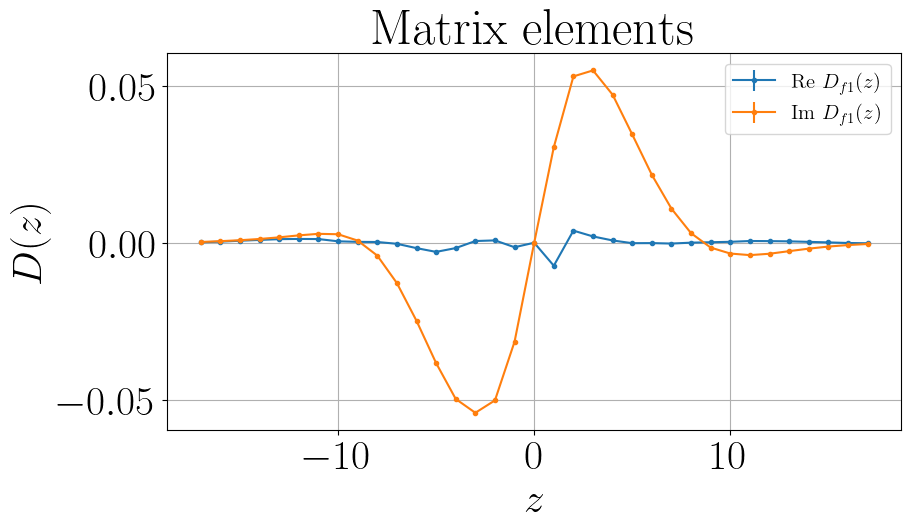

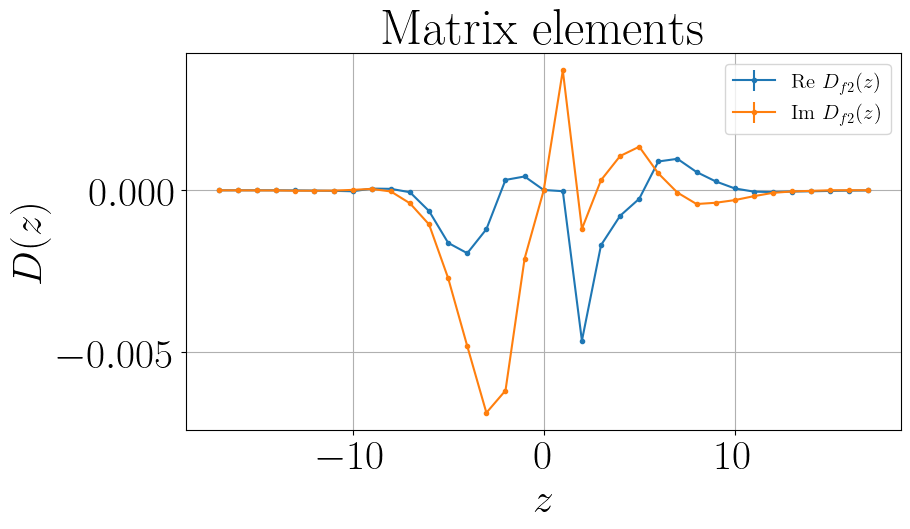

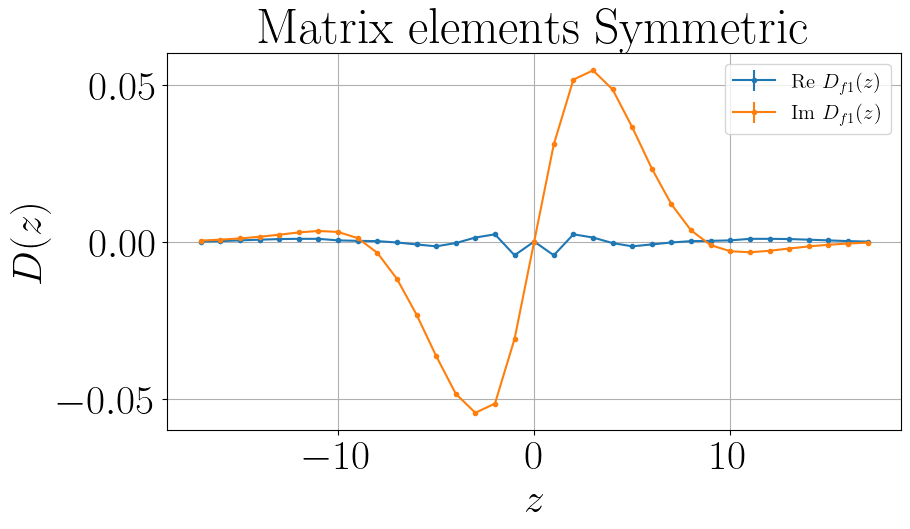

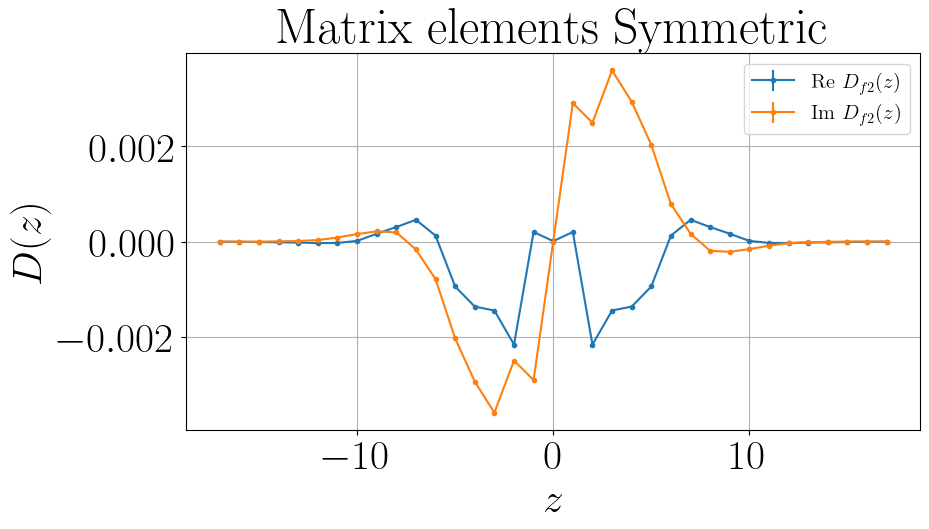

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(z_f1_s1, ME_real_f1_s1, yerr=ME_real_f1_err_s1, fmt='.-', label=r'Re $D_{f1}(z)$')
ax.errorbar(z_f1_s1, ME_imag_f1_s1, yerr=ME_imag_f1_err_s1, fmt='.-', label=r'Im $D_{f1}(z)$')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$D(z)$')
ax.legend(fontsize=15)
ax.set_title('Matrix elements')
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(z_f2_s1, ME_real_f2_s1, yerr=ME_real_f2_err_s1, fmt='.-', label=r'Re $D_{f2}(z)$')
ax.errorbar(z_f2_s1, ME_imag_f2_s1, yerr=ME_imag_f2_err_s1, fmt='.-', label=r'Im $D_{f2}(z)$')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$D(z)$')
ax.legend(fontsize=15)
ax.set_title('Matrix elements')
plt.grid()
plt.show()

ME_diff_f1_s1 = ME_had_f1_s1 - ME_vac_f1_s1
ME_diff_f1_s1 = (ME_diff_f1_s1 + ME_diff_f1_s1[::-1].conjugate()) / 2.0  # Symmetric
ME_real_f1_s1 = ME_diff_f1_s1.real
ME_imag_f1_s1 = ME_diff_f1_s1.imag
ME_diff_f2_s1 = ME_had_f2_s1 - ME_vac_f2_s1
ME_diff_f2_s1 = (ME_diff_f2_s1 + ME_diff_f2_s1[::-1].conjugate()) / 2.0  # Symmetric
ME_real_f2_s1 = ME_diff_f2_s1.real
ME_imag_f2_s1 = ME_diff_f2_s1.imag

fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(z_f1_s1, ME_real_f1_s1, yerr=ME_real_f1_err_s1, fmt='.-', label=r'Re $D_{f1}(z)$')
ax.errorbar(z_f1_s1, ME_imag_f1_s1, yerr=ME_imag_f1_err_s1, fmt='.-', label=r'Im $D_{f1}(z)$')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$D(z)$')
ax.legend(fontsize=15)
ax.set_title('Matrix elements Symmetric')
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(z_f2_s1, ME_real_f2_s1, yerr=ME_real_f2_err_s1, fmt='.-', label=r'Re $D_{f2}(z)$')
ax.errorbar(z_f2_s1, ME_imag_f2_s1, yerr=ME_imag_f2_err_s1, fmt='.-', label=r'Im $D_{f2}(z)$')
ax.set_xlabel(r'$ z$')
ax.set_ylabel(r'$D(z)$')
ax.legend(fontsize=15)
ax.set_title('Matrix elements Symmetric')
plt.grid()




# Code

In [18]:
#exponential and gaussian decay
def KrbfMat(x,s,w):
    xx=x.view(1,x.shape[0])
    yy=x.view(x.shape[0],1)
    return (s)*tr.exp(-0.5*((xx - yy)/w)**2)

def rbf_exp(v,s,w,r): #:2504.17706v1
    xx=v.view(1,v.shape[0])
    yy=v.view(v.shape[0],1)
    return tr.exp(-tr.abs(yy)/r) * tr.exp(-tr.abs(xx)/r) * KrbfMat(v,s,w)

def rbf_gauss(v,s,w,r): #:2504.17706v1
    xx=v.view(1,v.shape[0])
    yy=v.view(v.shape[0],1)
    return tr.exp(-0.5*(xx/r)**2)*tr.exp(-0.2*(yy/r)**2)*KrbfMat(v,s,w)

Text(0.5, 0, '$\\nu$')

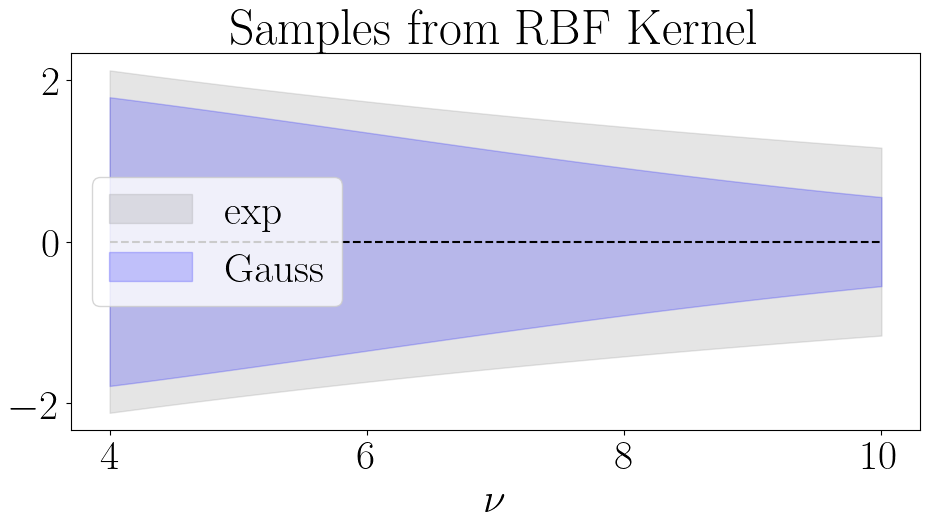

In [152]:
#generate samples with this kernels
nu=tr.linspace(4, 10, 100)

cov= rbf_exp(nu, 10.0, 0.6, 10.0)
cov=(cov + cov.T) / 2.0  + tr.eye(nu.shape[0]) * 1e-7  # Add small noise for numerical stability
dist = tr.distributions.MultivariateNormal(tr.zeros(nu.shape[0]), cov)
samples = dist.sample((500,))
mean = dist.mean
error= dist.variance.sqrt()

cov1= rbf_gauss(nu, 5.0, 0.6, 5.0)
cov1=(cov1 + cov1.T) / 2.0  + tr.eye(nu.shape[0]) * 1e-7  # Add small noise for numerical stability
dist1 = tr.distributions.MultivariateNormal(tr.zeros(nu.shape[0]), cov1)
samples1 = dist1.sample((500,))
mean1 = dist1.mean
error1 = dist1.variance.sqrt()
#plot samples
plt.figure(figsize=(10, 6))
plt.plot(nu.numpy(), np.zeros_like(nu.numpy()), 'k--')
plt.fill_between(nu.numpy(), (mean - error).numpy(), (mean + error).numpy(), color='gray', alpha=0.2, label='exp')
plt.fill_between(nu.numpy(), (mean1 - error1).numpy(), (mean1 + error1).numpy(), color='blue', alpha=0.2, label=' Gauss')
plt.legend()
plt.title('Samples from RBF Kernel')
plt.xlabel(r'$\nu$')

In [19]:
#construct the integrators

def TNdata_damp(gridnu,Mnu,errnu,nu_extrap,x_grid,CovD1,lamb,ITD="Re"):
    

    CovD=errnu[:]**2
    CovD=(CovD+CovD.T)/2.0+ np.diag(np.ones_like(CovD)*1e-6)  #add a small regularization to the covariance matrix
    #truncate covariance matrix

    Nx=x_grid.shape[0]
    fe=FE2_Integrator(x_grid)
    B_n = fe.set_up_integration(Kernel=lambda x: 1.0)
    B_d = np.zeros_like(B_n) 
    B_d[x_grid.shape[0]//2] = 1.0
    #B_d[x_grid.shape[0]-1]=1.0
    B_d1=np.zeros_like(B_n)
    B_d1[-1] = 1.0

    # is the nu values at current z
    B = np.zeros((gridnu.shape[0],Nx))
    for k in np.arange(gridnu.shape[0]):
        if ITD=="Re":
            B[k,:] = fe.set_up_integration(Kernel= lambda x : np.cos(gridnu[k]*x))
            lam = lamb[0]  #normalization
            lam_d = lamb[1] #x=1
            lam_d1 = lamb[2] #x=end
        elif ITD=="Im":
            B[k,:] = fe.set_up_integration(Kernel= lambda x : np.sin(gridnu[k]*x))
            lam_d = lamb[1] #x=1
            lam_d1 = lamb[2] #x=end
    B_extrap = np.zeros((nu_extrap.shape[0],Nx))
    for k in np.arange(nu_extrap.shape[0]):
        if ITD=="Re":
            B_extrap[k,:] = fe.set_up_integration(Kernel= lambda x : np.cos(nu_extrap[k]*x))
        elif ITD=="Im":
            B_extrap[k,:] = fe.set_up_integration(Kernel= lambda x : np.sin(nu_extrap[k]*x))
    
    if ITD=="Re":
        V = np.concatenate((B_d[np.newaxis,:],B_d1[np.newaxis,:],B, B_extrap))
        Gamma = np.zeros((V.shape[0],V.shape[0]))
        #print(V.shape)
        #print(Gamma.shape)
        Gamma[0,0] = lam_d
        Gamma[1,1] = lam_d1
        #Gamma[2,2] = lam
        #Gamma[2:,2:] = CovD + Reg#np.diag(eM)#CovD
        Gamma[2:CovD.shape[0]+2,2:CovD.shape[1]+2] = CovD #np.diag(eM**2)
        Gamma[-nu_extrap.shape[0]:,-nu_extrap.shape[0]:] = CovD1
        Y = np.concatenate(([0.0,0.0],Mnu,np.zeros_like(nu_extrap)))
    elif ITD=="Im":
        V = np.concatenate((B_d[np.newaxis,:],B_d1[np.newaxis,:],B, B_extrap))
        #print(V.shape)
        Gamma = np.zeros((V.shape[0],V.shape[0]))
        #print(Gamma.shape)
        Gamma[0,0] = lam_d
        Gamma[1,1] = lam_d1
        Gamma[2:CovD.shape[0]+2,2:CovD.shape[1]+2] = CovD #np.diag(eM**2)
        Gamma[-nu_extrap.shape[0]:,-nu_extrap.shape[0]:] = CovD1
        Y = np.concatenate(([0.0,0.0],Mnu, np.zeros_like(nu_extrap)))
    return x_grid,V,Y,Gamma


In [20]:
#construct the integrators

def TNdata_damp1(gridnu,Mnu,errnu,nu_extrap,x_grid,CovD1,lamb,ITD="Re"):
    

    CovD=errnu[:]**2
    CovD=(CovD+CovD.T)/2.0+ np.diag(np.ones_like(CovD)*1e-6)  #add a small regularization to the covariance matrix
    #truncate covariance matrix

    Nx=x_grid.shape[0]
    fe=FE2_Integrator(x_grid)
    B_n = fe.set_up_integration(Kernel=lambda x: 1.0)
    B_d = np.zeros_like(B_n) 
    B_d[x_grid.shape[0]//2] = 1.0
    #B_d[x_grid.shape[0]-1]=1.0
    B_d1=np.zeros_like(B_n)
    B_d1[-1] = 1.0

    # is the nu values at current z
    B = np.zeros((gridnu.shape[0],Nx))
    for k in np.arange(gridnu.shape[0]):
        if ITD=="Re":
            B[k,:] = fe.set_up_integration(Kernel= lambda x : np.cos(gridnu[k]*x))
            lam = lamb[0]  #normalization
            lam_d = lamb[1] #x=1
            lam_d1 = lamb[2] #x=end
        elif ITD=="Im":
            B[k,:] = fe.set_up_integration(Kernel= lambda x : np.sin(gridnu[k]*x))
            lam_d = lamb[1] #x=1
            lam_d1 = lamb[2] #x=end
    B_extrap = np.zeros((nu_extrap.shape[0],Nx))
    for k in np.arange(nu_extrap.shape[0]):
        if ITD=="Re":
            B_extrap[k,:] = fe.set_up_integration(Kernel= lambda x : np.cos(nu_extrap[k]*x))
        elif ITD=="Im":
            B_extrap[k,:] = fe.set_up_integration(Kernel= lambda x : np.sin(nu_extrap[k]*x))
    
    if ITD=="Re":
        V = np.concatenate((B_d1[np.newaxis,:],B, B_extrap))
        Gamma = np.zeros((V.shape[0],V.shape[0]))
        #print(V.shape)
        #print(Gamma.shape)
        #Gamma[0,0] = lam_d
        Gamma[0,0] = lam_d1
        #Gamma[2,2] = lam
        #Gamma[2:,2:] = CovD + Reg#np.diag(eM)#CovD
        Gamma[1:CovD.shape[0]+1,1:CovD.shape[1]+1] = CovD #np.diag(eM**2)
        Gamma[-nu_extrap.shape[0]:,-nu_extrap.shape[0]:] = CovD1
        Y = np.concatenate(([0.0],Mnu,np.zeros_like(nu_extrap)))
    elif ITD=="Im":
        V = np.concatenate((B_d1[np.newaxis,:],B, B_extrap))
        #print(V.shape)
        Gamma = np.zeros((V.shape[0],V.shape[0]))
        #print(Gamma.shape)
        #Gamma[0,0] = lam_d
        Gamma[0,0] = lam_d1
        Gamma[1:CovD.shape[0]+1,1:CovD.shape[1]+1] = CovD #np.diag(eM**2)
        Gamma[-nu_extrap.shape[0]:,-nu_extrap.shape[0]:] = CovD1
        Y = np.concatenate(([0.0],Mnu, np.zeros_like(nu_extrap)))
    return x_grid,V,Y,Gamma


In [23]:
#construct the integrators

def TNdata(gridnu,Mnu,errnu,x_grid,lamb,mh,ITD="Re"):
    

    CovD=errnu[:]**2
    CovD=(CovD+CovD.T)/2.0+ np.diag(np.ones_like(CovD)*1e-6)  #add a small regularization to the covariance matrix
    #truncate covariance matrix

    Nx=x_grid.shape[0]
    fe=FE2_Integrator(x_grid)
    B_n = fe.set_up_integration(Kernel=lambda x: 1.0)
    B_d = np.zeros_like(B_n) 
    B_d[x_grid.shape[0]//3] = 1.0
    #B_d[x_grid.shape[0]-1]=1.0
    B_d1=np.zeros_like(B_n)
    B_d1[-1] = 1.0
    # is the nu values at current z
    B = np.zeros((gridnu.shape[0],Nx))
    for k in np.arange(gridnu.shape[0]):
        if ITD=="Re":
            B[k,:] = fe.set_up_integration(Kernel= lambda x : np.cos(gridnu[k]*x))
            lam = lamb[0]  #normalization
            lam_d = lamb[1] #x=1
            lam_d1 = lamb[2] #x=end
        elif ITD=="Im":
            B[k,:] = fe.set_up_integration(Kernel= lambda x : np.sin(gridnu[k]*x))
            lam_d = lamb[1] #x=1
            lam_d1 = lamb[2] #x=end
    if ITD=="Re":
        V = np.concatenate((B_d[np.newaxis,:],B_d1[np.newaxis,:],B))
        Gamma = np.zeros((V.shape[0],V.shape[0]))
        Gamma[0,0] = lam_d
        Gamma[1,1] = lam_d1
        #Gamma[2,2] = lam
        #Gamma[2:,2:] = CovD + Reg#np.diag(eM)#CovD
        Gamma[2:,2:] = CovD #np.diag(eM**2)
        Y = np.concatenate(([0.0,0.0],Mnu))
    elif ITD=="Im":
        V = np.concatenate((B_d[np.newaxis,:],B_d1[np.newaxis,:],B))
        Gamma = np.zeros((V.shape[0],V.shape[0]))
        Gamma[0,0] = lam_d
        Gamma[1,1] = lam_d1
        Gamma[2:,2:] = CovD #np.diag(eM**2)
        Y = np.concatenate(([0.0,0.0],Mnu))
    return x_grid,V,Y,Gamma


In [5]:
m005_Re[z<0]=-m005_Re[z<0]

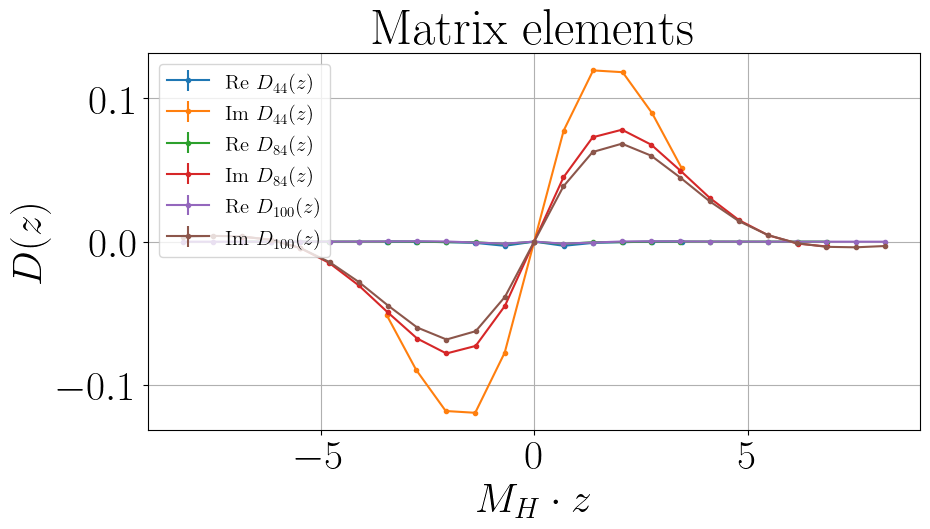

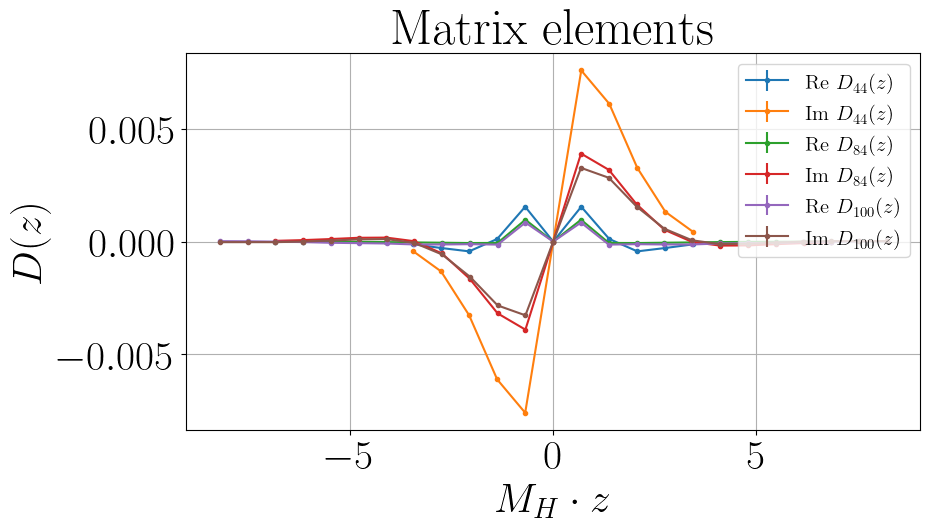

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(MH_44*z_44, m_05_Re_44, yerr=m_05_44_Re_err, fmt='.-', label=r'Re $D_{44}(z)$')
ax.errorbar(MH_44*z_44, m_05_Im_44, yerr=m_05_44_Im_err, fmt='.-', label=r'Im $D_{44}(z)$')
ax.errorbar(MH_84*z_84, m_05_84_Re, yerr=m_05_84_Re_err, fmt='.-', label=r'Re $D_{84}(z)$')
ax.errorbar(MH_84*z_84, m_05_84_Im, yerr=m_05_84_Im_err, fmt='.-', label=r'Im $D_{84}(z)$')
ax.errorbar(MH_100*z_100, m_05_100_Re, yerr=m_05_100_Re_err, fmt='.-', label=r'Re $D_{100}(z)$')
ax.errorbar(MH_100*z_100, m_05_100_Im, yerr=m_05_100_Im_err, fmt='.-', label=r'Im $D_{100}(z)$')
ax.set_xlabel(r'$M_H\cdot z$')
ax.set_ylabel(r'$D(z)$')
ax.legend(fontsize=15)
ax.set_title('Matrix elements')
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(MH_44*z_44, m_25_Re_44, yerr=m_25_44_Re_err, fmt='.-', label=r'Re $D_{44}(z)$')
ax.errorbar(MH_44*z_44, m_25_Im_44, yerr=m_25_44_Im_err, fmt='.-', label=r'Im $D_{44}(z)$')
ax.errorbar(MH_84*z_84, m_25_84_Re, yerr=m_25_84_Re_err, fmt='.-', label=r'Re $D_{84}(z)$')
ax.errorbar(MH_84*z_84, m_25_84_Im, yerr=m_25_84_Im_err, fmt='.-', label=r'Im $D_{84}(z)$')
ax.errorbar(MH_100*z_100, m_25_100_Re, yerr=m_25_100_Re_err, fmt='.-', label=r'Re $D_{100}(z)$')
ax.errorbar(MH_100*z_100, m_25_100_Im, yerr=m_25_100_Im_err, fmt='.-', label=r'Im $D_{100}(z)$')

ax.set_xlabel(r'$M_H\cdot z$')
ax.set_ylabel(r'$D(z)$')
ax.legend(fontsize=15)
ax.set_title('Matrix elements')
plt.grid()
plt.show()

<ErrorbarContainer object of 3 artists>

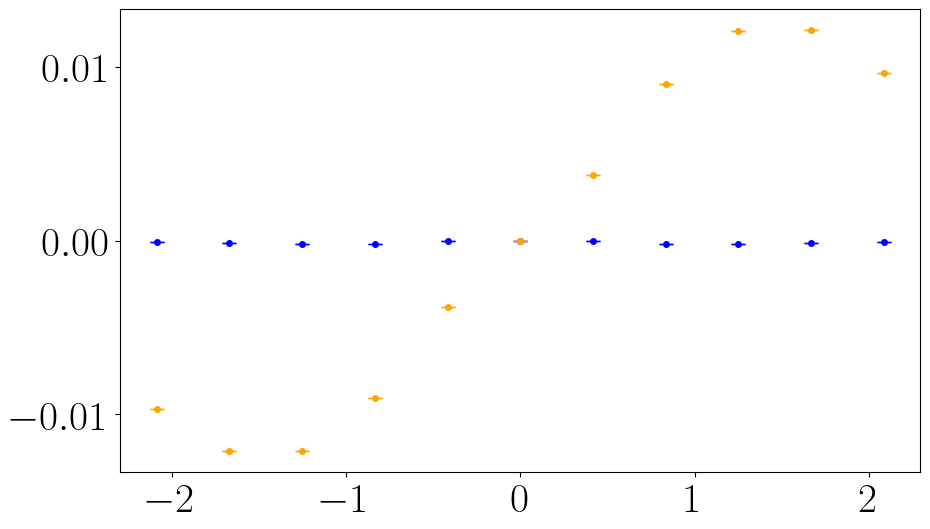

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
z_re= z#[z>-0.10]
z_im= z
data_re=m016_Re#[z>-0.10]
data_im=m016_Im
data_re_err=m016_Re_err#[z>-0.10]
data_im_err=m016_Im_err
ax.errorbar(MH*z_re, data_re, yerr=data_re_err, fmt='.', label='Real Part', color='blue', markersize=8, capsize=5)
ax.errorbar(MH*z_im, data_im, yerr=data_im_err, fmt='.', label='Imaginary Part', color='orange', markersize=8, capsize=5)
# Generate a range of z values for interpolation

In [ ]:
ax.errorbar(MH*z_re, data_re, yerr=data_re_err, fmt='.', label='Real Part', color='blue', markersize=8, capsize=5)
ax.errorbar(MH*z_im, data_im, yerr=data_im_err, fmt='.', label='Imaginary Part', color='orange', markersize=8, capsize=5)

In [97]:
z_84.max()

10.0

In [67]:
#mean,sigma,config,mod,ker,modfunc,kerfunc,device,mode,ID,x_grid,lab = arguments("g_flat","Krbflog","no""cpu","all",12,grid,Nx)
#x_grid=generategrid(256,"log_lin")

def models(data_im, data_re, data_im_err, data_re_err,z_re, z_im, MH, x_grid,nu_extrap,sigma1=5.0,half=True):
    #ITD="Re"
    #x_grid=generategrid(Nx,"log_lin")
    constr=[1e-1,5e-2,1e-5]
    if half == True:
        data_re1=data_re[z_re>-0.1]
        data_im1=data_im[z_im>-0.1]
        z_re1=z_re[z_re>-0.1]
        z_im1=z_im[z_im>-0.1]
        data_re_err1=data_re_err[z_re>-0.1]
        data_im_err1=data_im_err[z_im>-0.1]
    else:
        data_re1=data_re
        data_im1=data_im
        z_re1=z_re
        z_im1=z_im
        data_re_err1=data_re_err
        data_im_err1=data_im_err
    #x_grid=np.linspace(1e-6, 2.0, Nx+1)
    #x_gri0,V0,Y0,Gamma0 = QCdata(nu_old[1:],M[1:],M_erro[1:],x_grid,[1e-5,1e-1,1e-5],ITD)
    #x_gri0,V0,Y0,Gamma0 = TNdata(MH*z_re,data_re,data_re_err,x_grid,constr,"Re")
    sigma2=max(abs(data_im1))
    print("sigma2:", sigma2)
    #CovD1=rbf_exp(tr.tensor(nu_extrap), sigma2, 0.6, 3.0).numpy()
    #CovD1=rbf_gauss(tr.tensor(nu_extrap), sigma2*5, 0.7, 1.8).numpy()
    CovD1=KrbfMat(tr.tensor(nu_extrap), sigma2**2, 0.7).numpy()
    x_gri0, V0, Y0, Gamma0 = TNdata_damp1(MH*z_re1,data_re1,data_re_err1,nu_extrap,x_grid,CovD1,constr,"Re")
    #x_gri0, V0, Y0, Gamma0 = QCdata(nuIm[:],dzim[:],Dzim_err[:],x_grid,[1e-5,1e-1,1e-2],ITD)
    myGP0_re= GaussianProcess(x_gri0,V0,Y0,Gamma0,"TNdata","cpu","Re","Krbflog","g_flat",['N','σ','l'],"linear",Pd=g_flat,Ker=Krbflog,mode="all",ID=12,Pd_args=(0.0,),Ker_args=(sigma1,0.7))
    myGP0_re.nu_extrap=nu_extrap
    myGP0_re.covariance=CovD1
    #myGP0_re= GaussianProcess(x_gri0,V0,Y0,Gamma0,"QCdata","cpu","Re","Krbflog","g_flat",['a','b','N','σ','l'],"linear",Pd=PDF_N,Ker=Krbflog,mode="all",ID=12,Pd_args=(0.0,1.0,2.0),Ker_args=(10.0,0.6))
    #myGP0_re.prior2ndlevel("all",0.99,mean=tr.tensor([0.0,0.0,0.0]),sigma=tr.tensor([10.0,10.0,10.0]),prior_mode=tr.tensor([2,2,2]))
    myGP0_re.prior2ndlevel("all",0.99,mean=tr.tensor([-1.0,0.0,0.0,0.0,0.0]),sigma=tr.tensor([2.0,15.0,15.0,15.0,15.0]),prior_mode=tr.tensor([2,2,2,2,2]))

    #x_gri0, V0, Y0, Gamma0 = TNdata(MH*z_im,data_im,data_im_err,x_grid,constr,"Im")
    x_gri0, V0, Y0, Gamma0 = TNdata_damp1(MH*z_im1,data_im1,data_im_err1,nu_extrap,x_grid,CovD1,constr,"Im")
    myGP0_im= GaussianProcess(x_gri0,V0,Y0,Gamma0,"TNdata","cpu","Im","Krbflog","g_flat",['a','b','N','σ','l'],"linear",Pd=g_flat,Ker=Krbflog,mode="all",ID=12,Pd_args=(0.0,),Ker_args=(sigma1,0.7))
    #myGP0_im= GaussianProcess(x_gri0,V0,Y0,Gamma0,"QCdata","cpu","Im","Krbflog","PDF_N",['a','b','N','σ','l'],"linear",Pd=PDF_N,Ker=Krbflog,mode="all",ID=12,Pd_args=(0.2,1.0,0.5),Ker_args=(sigma1,.7))
    #myGP0_im.prior2ndlevel("all",0.99,mean=tr.tensor([0.0,0.0,0.0]),sigma=tr.tensor([10.0,10.0,10.0]),prior_mode=tr.tensor([2,2,2]))
    myGP0_im.prior2ndlevel("all",0.99,mean=tr.tensor([-1.0,0.0,0.0,0.0,0.0]),sigma=tr.tensor([2.0,15.0,15.0,15.0,15.0]),prior_mode=tr.tensor([2,2,2,2,2]))
    return myGP0_re, myGP0_im


x_grid=np.linspace(0.0, 4.0, 257)
numax=20

In [75]:
nuextrap=np.linspace(Mh_f1_s1[0]*z_f1_s1.max()+0.5,25,30)
x_grid=np.linspace(0.0, 3.0, 257)

model_re_005, model_im_005 = models(ME_imag_f1_s1, ME_real_f1_s1, ME_imag_f1_err_s1, ME_real_f1_err_s1, z_f1_s1, z_f1_s1, Mh_f1_s1[0], x_grid, nuextrap, sigma1=5.0)
model_re_025, model_im_025 = models(ME_imag_f2_s1, ME_real_f2_s1, ME_imag_f2_err_s1, ME_real_f2_err_s1, z_f2_s1, z_f2_s1, Mh_f2_s1[0], x_grid, nuextrap, sigma1=5.0)


sigma2: 0.05449366583786139
sigma2: 0.003594252000982406


### old data

In [ ]:
model_re_005, model_im_005 = models(m005_Im, m005_Re, m005_Im_err, m005_Re_err, z_re, z_im, MH, x_grid, nu_extrap=nuextrap, sigma1=10.0)
model_re_025, model_im_025 = models(m025_Im, m025_Re, m025_Im_err, m025_Re_err, z_re, z_im, MH, x_grid, nu_extrap=nuextrap, sigma1=0.005)

model_re_014, model_im_014 = models(m014_Im, m014_Re, m014_Im_err, m014_Re_err, z_re, z_im, MH, x_grid, nu_extrap=nuextrap, sigma1=10.0)
model_re_016, model_im_016 = models(m016_Im, m016_Re, m016_Im_err, m016_Re_err, z_re, z_im, MH, x_grid, nu_extrap=nuextrap, sigma1=0.01)

### peter data

In [ ]:
nuextrap_44=np.linspace(MH_44*z_44.max()+0.5,20,30)
nuextrap_84=np.linspace(MH_84*z_84.max()+0.5,20,30)
nuextrap_100=np.linspace(MH_100*z_100.max()+0.5,20,30)

model_re_005_44, model_im_005_44 = models(m_05_Im_44,m_05_Re_44, m_05_44_Im_err, m_05_44_Re_err, z_44, z_44, MH_44, x_grid, nu_extrap=nuextrap_44, sigma1=5.0)
model_re_025_44, model_im_025_44 = models(m_25_Im_44, m_25_Re_44, m_25_44_Im_err, m_25_44_Re_err, z_44, z_44, MH_44, x_grid, nu_extrap=nuextrap_44, sigma1=0.001)

model_re_005_84, model_im_005_84 = models(m_05_84_Im, m_05_84_Re, m_05_84_Im_err, m_05_84_Re_err, z_84, z_84, MH_84, x_grid, nu_extrap=nuextrap_84, sigma1=5.0)
model_re_025_84, model_im_025_84 = models(m_25_84_Im, m_25_84_Re, m_25_84_Im_err, m_25_84_Re_err, z_84, z_84, MH_84, x_grid, nu_extrap=nuextrap_84, sigma1=0.001)

model_re_005_100, model_im_005_100 = models(m_05_100_Im, m_05_100_Re, m_05_100_Im_err, m_05_100_Re_err, z_100, z_100, MH_100, x_grid, nu_extrap=nuextrap_100, sigma1=5.0)
model_re_025_100, model_im_025_100 = models(m_25_100_Im, m_25_100_Re, m_25_100_Im_err, m_25_100_Re_err, z_100, z_100, MH_100, x_grid, nu_extrap=nuextrap_100, sigma1=0.001)


sigma2: 0.11940520857270316


/sciclone/home/yacahuanamedra/.conda/envs/gptorch/lib/python3.12/site-packages/torchquad/integration/utils.py:248: UserWarning: DEPRECATION WARNING: In future versions of torchquad, an array-like object will be returned.
  warnings.warn(


sigma2: 0.0075884980840547865
sigma2: 0.07803024630067791
sigma2: 0.0039027484029769306
sigma2: 0.06828508292116998
sigma2: 0.0032688403097893975


## exponential decay

In [25]:
#train
def train_models(myGP0_re, myGP0_im):
    myGP0_re.train(1000,lr=1e-2,mode="all",function="evidence")
    print("Training finished")
    print(myGP0_re.pd_args,myGP0_re.ker_args)
    myGP0_im.train(1000,lr=1e-2,mode="all",function="evidence")
    print("Training finished")
    print(myGP0_im.pd_args,myGP0_im.ker_args)
print("Training models...")
print("m=5")
train_models(model_re_005, model_im_005)
print("m=25")
train_models(model_re_025, model_im_025)
print("m=14")
train_models(model_re_014, model_im_014)
print("m=016")
train_models(model_re_016, model_im_016)

Training models...
m=5
Training everything TNdata


/sciclone/scr-lst/yacahuanamedra/GP/GP.py:492: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724789563135/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  nlp= 0.5*(X@X.T+ 2*tr.logdet(L))


NaN detected
Training finished
(tensor(0.0048),) (tensor(-0.0183), tensor(2.9746))
Training everything TNdata
Training finished
(tensor(0.0575),) (tensor(0.0483), tensor(3.1677))
m=25
Training everything TNdata
NaN detected
Training finished
(tensor(0.0165),) (tensor(-0.0182), tensor(2.9762))
Training everything TNdata
NaN detected
Training finished
(tensor(-0.0157),) (tensor(-0.0150), tensor(2.6306))
m=14
Training everything TNdata
NaN detected
Training finished
(tensor(0.0091),) (tensor(-0.0184), tensor(2.9753))
Training everything TNdata
Training finished
(tensor(0.0336),) (tensor(0.0124), tensor(1.4773))
m=016
Training everything TNdata
NaN detected
Training finished
(tensor(-0.0142),) (tensor(-0.0181), tensor(2.9765))
Training everything TNdata
NaN detected
Training finished
(tensor(-0.0110),) (tensor(-0.0131), tensor(2.7598))


In [71]:
nu_theo=np.linspace(-25,25.0,128)
Nx=x_grid.shape[0]
print("max",x_grid.max(),"min",x_grid.min())
iBre= np.zeros((nu_theo.shape[0],Nx))
iBim= np.zeros((nu_theo.shape[0],Nx))
#B_theo= np.zeros((nu_theo.shape[0],Nx+1))
fe=FE2_Integrator(x_grid)
for k in np.arange(nu_theo.shape[0]):
    iBre[k,:] = fe.set_up_integration(Kernel= lambda x : np.cos(nu_theo[k]*x))
    iBim[k,:] = fe.set_up_integration(Kernel= lambda x : np.sin(nu_theo[k]*x))

max 4.0 min 0.0


In [72]:
def plot_results(myGP0_re, myGP0_im, x_grid, nu_theo, iBre,iBim, MH,z, data_re,data_re_err, data_im, data_im_err,name,init,final):
    fCI=1
    fig, ax= plt.subplots(1,2, figsize=(20, 7))
    ax[0].set_title(rf'$q(x)$ Posterior ({{{name}}})', fontsize=30)
    ax[1].set_title(rf'$M(\nu)$ Posterior ({{{name}}})', fontsize=30)
    p_re,Cp_re=myGP0_re.ComputePosterior()
    p_im,Cp_im=myGP0_im.ComputePosterior()

    Cp_re=(Cp_re+Cp_re.T)/2.0+ np.diag(np.ones_like(Cp_re.diag())*1e-6)  #add a small regularization to the covariance matrix
    Cp_im=(Cp_im+Cp_im.T)/2.0+ np.diag(np.ones_like(Cp_im.diag())*1e-6)  #add a small regular

    perr= Cp_re.diag().sqrt()
    perr_im= Cp_im.diag().sqrt()
    ax[0].plot(x_grid, p_re, color='blue', alpha=0.5)#, label='mean')
    ax[0].fill_between(x_grid, p_re - fCI * perr, p_re + fCI * perr, color='blue', alpha=0.1)
    ax[0].plot(x_grid, p_im, color='orange', alpha=0.5)#, label='mean Im')
    ax[0].fill_between(x_grid, p_im - fCI * perr_im, p_im + fCI * perr_im, color='orange', alpha=0.1)
    ax[0].set_xlabel(r'$x$')
    ax[0].set_ylabel(r'$q(x)$')
    ax[0].set_ylim(init, final)
    #show grid
    ax[0].grid()
    #nuspace
    nu_theo=tr.tensor(nu_theo)
    iB=tr.tensor(iBre)
    MM=(iB @ p_re).reshape(-1)
    covnu=iB @ Cp_re @ iB.T
    Qerror=covnu.diag().abs().sqrt()

    iB_im = tr.tensor(iBim)
    MM_im = (iB_im @ p_im).reshape(-1)
    covnu_im = iB_im @ Cp_im @ iB_im.T
    Qerror_im = covnu_im.diag().abs().sqrt()

    #negative values
    #covnu[covnu<0]=0
    ax[1].set_xlabel(r'$\nu=m_H \cdot z$')
    ax[1].set_ylabel(r'$M(\nu)=\bra{P}\bar{\psi}(z)\psi(0)\ket{P}$', fontsize=20)
    ax[1].plot(nu_theo, MM, color='blue', alpha=0.5, label=r'$q_-(x)$')
    ax[1].fill_between(nu_theo, MM - fCI * Qerror, MM + fCI * Qerror, color='blue', alpha=0.1)

    ax[1].plot(nu_theo, MM_im, color='orange', alpha=0.5,label=r'$q_+(x)$')
    ax[1].fill_between(nu_theo, MM_im - fCI * Qerror_im, MM_im + fCI * Qerror_im, color='orange', alpha=0.1)

    nuuu=myGP0_re.nu_extrap
    cov=  tr.tensor(myGP0_re.covariance)
    #print(cov.shape)
    qqerror=cov.diag().abs().sqrt()
    ax[1].plot(nuuu, np.zeros_like(nuuu), color='gray', alpha=0.5)
    ax[1].fill_between(nuuu, -qqerror, qqerror, color='gray', alpha=0.1)
    ax[1].plot(-nuuu, np.zeros_like(nuuu), color='gray', alpha=0.5)
    ax[1].fill_between(-nuuu, -qqerror, qqerror, color='gray', alpha=0.1)
    
    #ax[1].fill_between(nu_theo, -1.0, 1.0, color='gray', alpha=0.2, label='Prior')
    #ax[1].errorbar(nu_old, M, yerr=M_erro, fmt='.', label='Data', color='blue', markersize=8, capsize=5)
    ax[1].errorbar(MH*z, data_re, yerr=data_re_err, fmt='.', color='blue', markersize=8, capsize=5)
    ax[1].errorbar(MH*z, data_im, yerr=data_im_err, fmt='.', color='orange', markersize=8, capsize=5)
    ax[1].set_ylim(min(data_im)*3.4, max(data_im)*3.4)
    ax[1].set_xlim(min(z)*MH*2.5, max(z)*MH*2.5)
    ax[1].legend()
    #ax[1].errorbar(nuIm, dzim, yerr=Dzim_err, fmt='.', label='Data', color='blue', markersize=8, capsize=5)


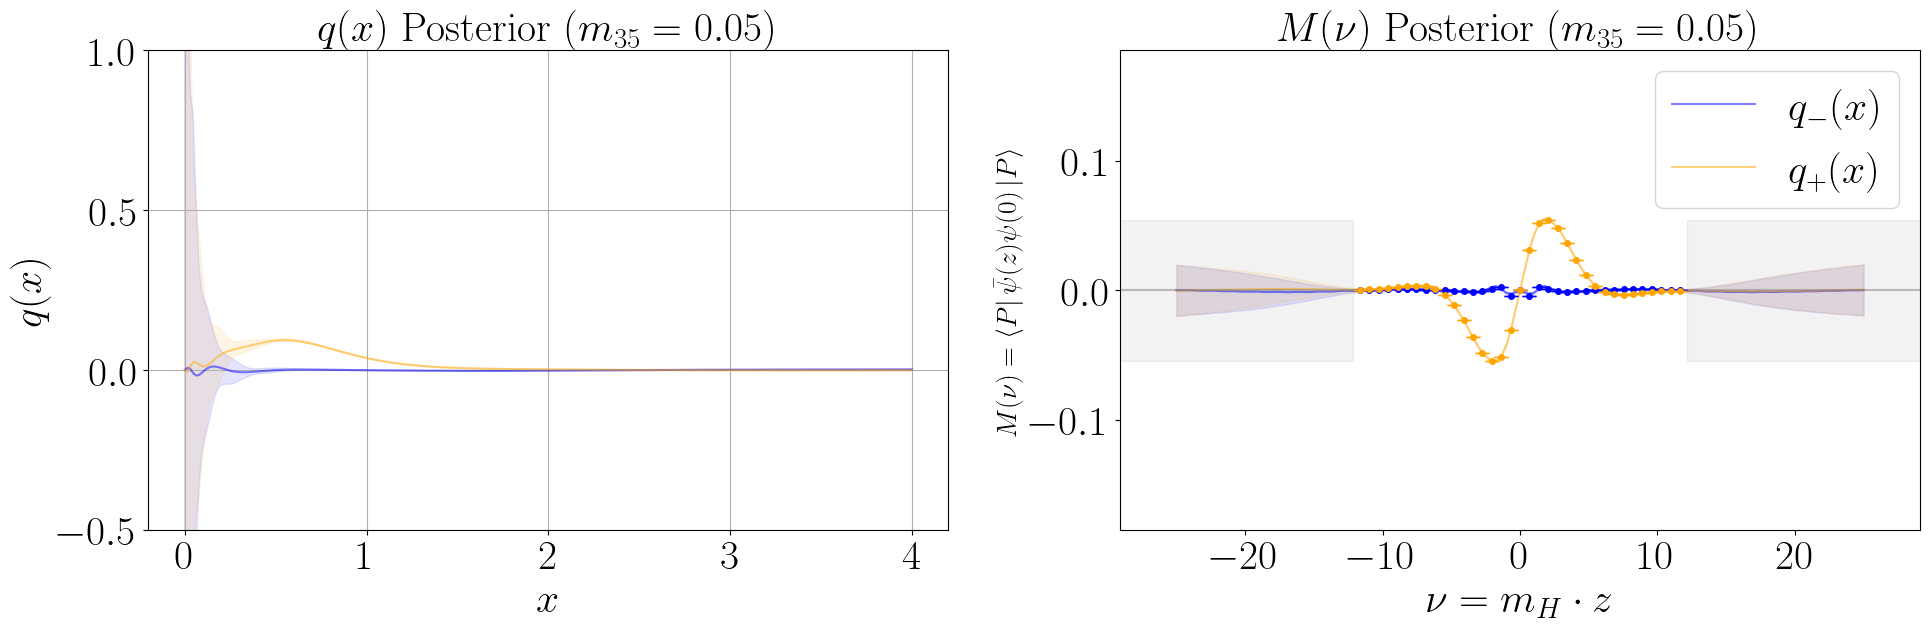

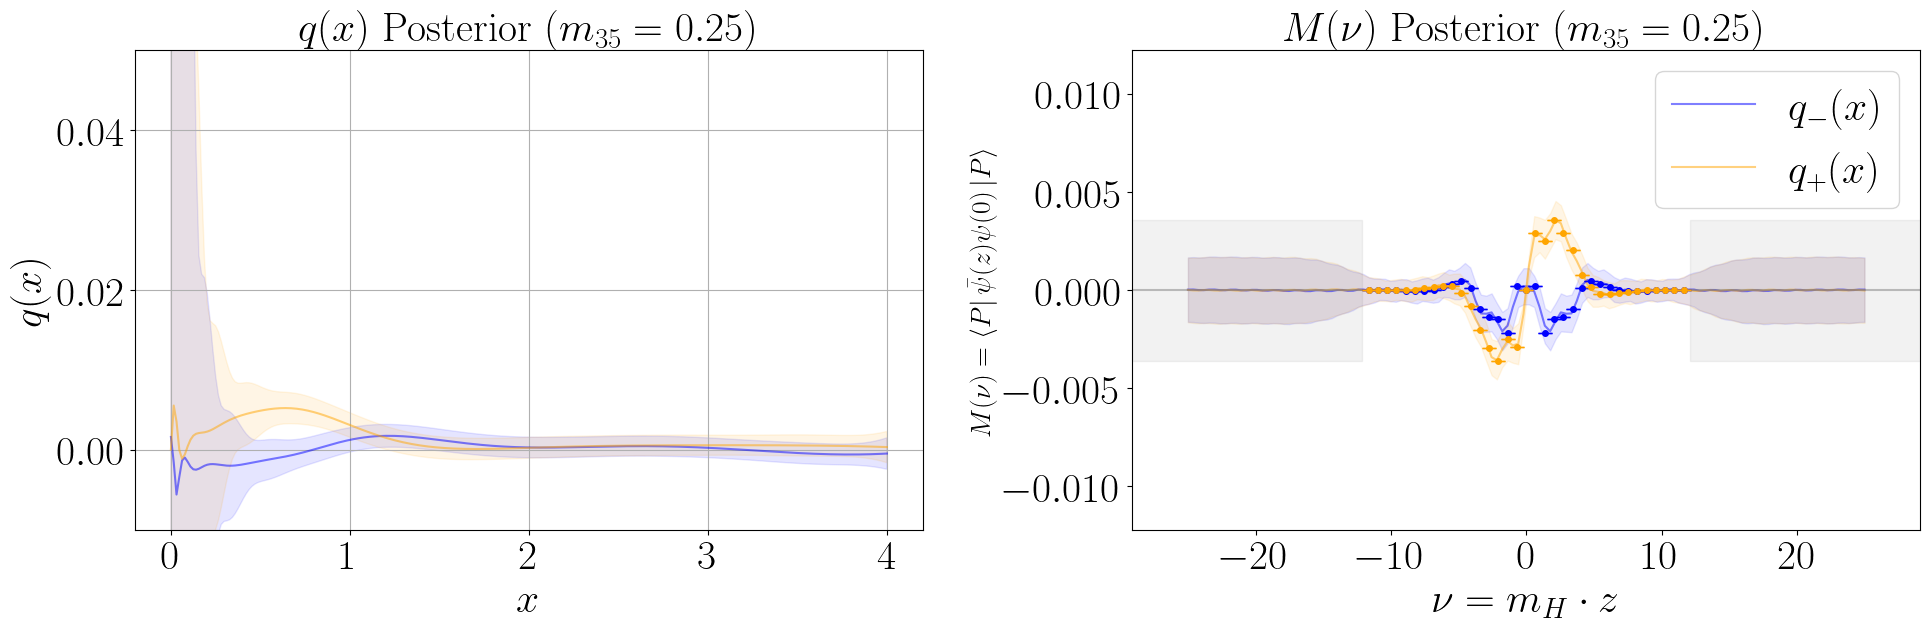

In [73]:
plot_results(model_re_005, model_im_005, x_grid, nu_theo, iBre, iBim, Mh_f1_s1[0], z_f1_s1, data_re=ME_real_f1_s1, data_re_err=ME_real_f1_err_s1, data_im=ME_imag_f1_s1, data_im_err=ME_imag_f1_err_s1,name=r"$m_{35}=0.05$",init=-0.5,final=1)

plot_results(model_re_025, model_im_025, x_grid, nu_theo, iBre, iBim, Mh_f2_s1[0], z_f2_s1, data_re=ME_real_f2_s1, data_re_err=ME_real_f2_err_s1, data_im=ME_imag_f2_s1, data_im_err=ME_imag_f2_err_s1,name=r"$m_{35}=0.25$",init=-0.01,final=0.05)



### old data

In [ ]:
plot_results(model_re_005, model_im_005, x_grid, nu_theo, iBre, iBim,MH, data_re=m005_Re, data_re_err=m005_Re_err, data_im=m005_Im, data_im_err=m005_Im_err,name="m=0.05")
plot_results(model_re_025, model_im_025, x_grid, nu_theo, iBre, iBim,MH, data_re=m025_Re, data_re_err=m025_Re_err, data_im=m025_Im, data_im_err=m025_Im_err,name="m=0.25")
plot_results(model_re_014, model_im_014, x_grid, nu_theo, iBre, iBim,MH, data_re=m014_Re, data_re_err=m014_Re_err, data_im=m014_Im, data_im_err=m014_Im_err,name="m=0.14")
plot_results(model_re_016, model_im_016, x_grid, nu_theo, iBre, iBim,MH, data_re=m016_Re, data_re_err=m016_Re_err, data_im=m016_Im, data_im_err=m016_Im_err,name="m=0.16")

### peter data

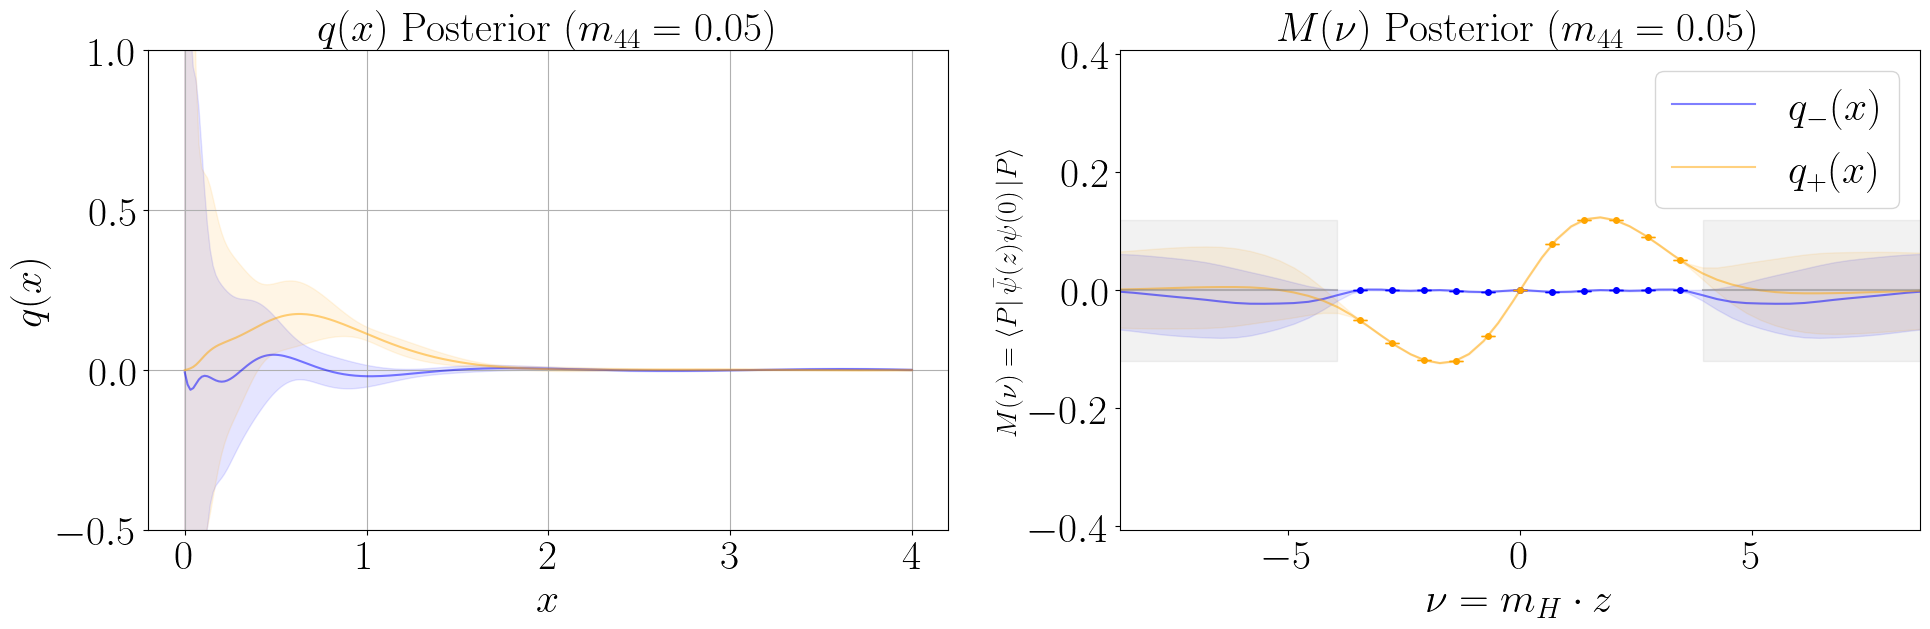

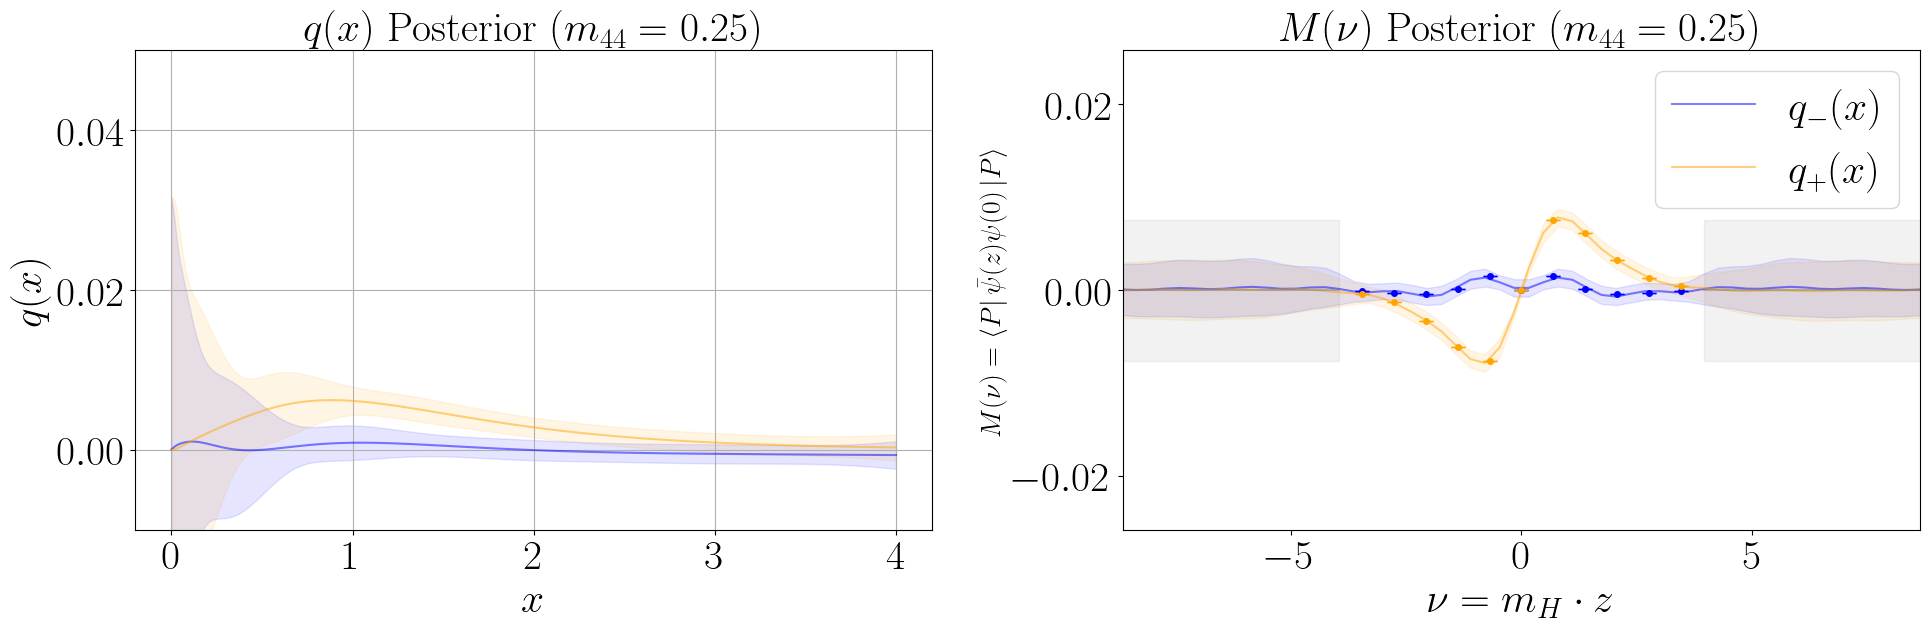

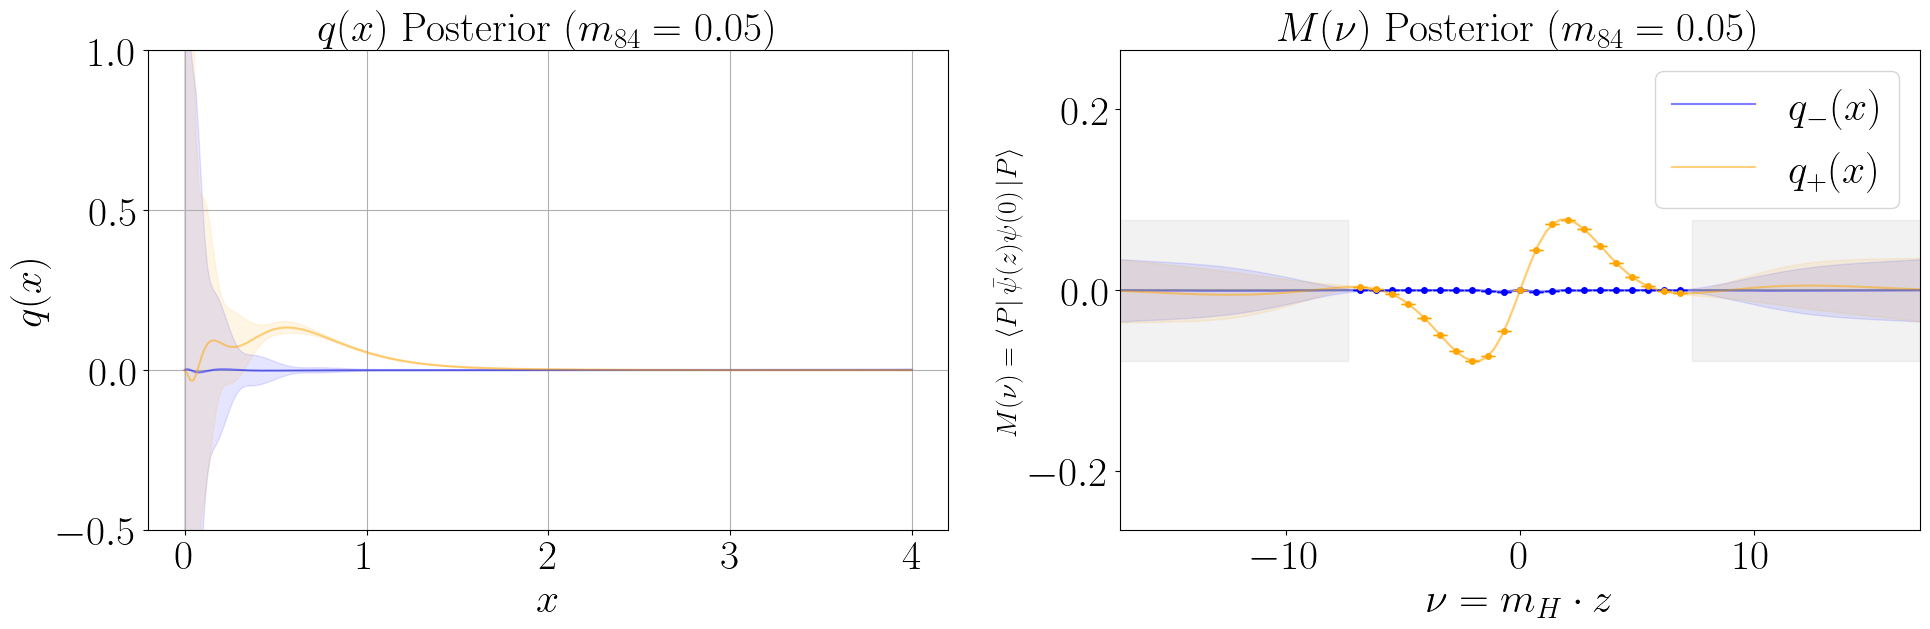

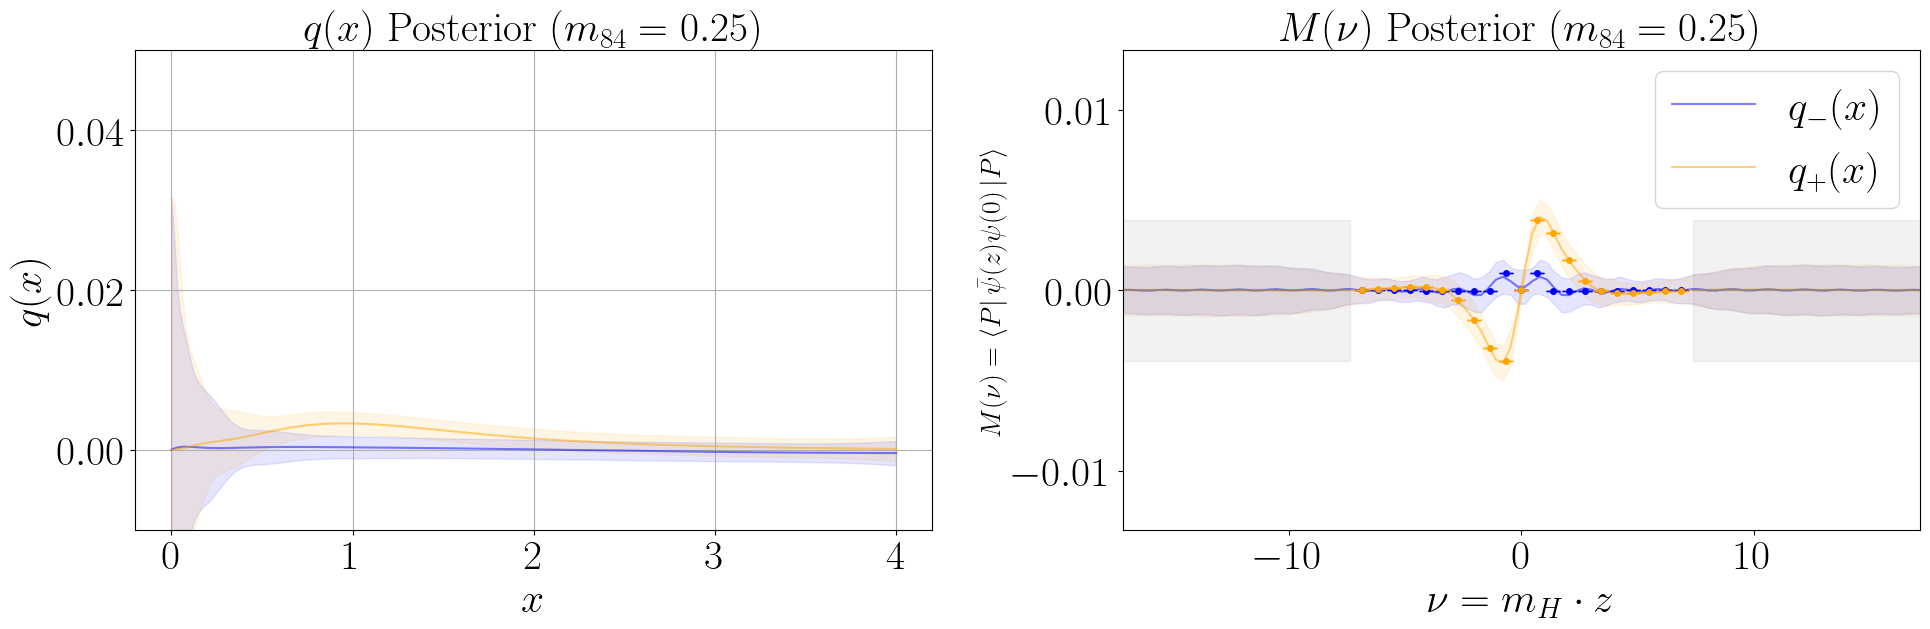

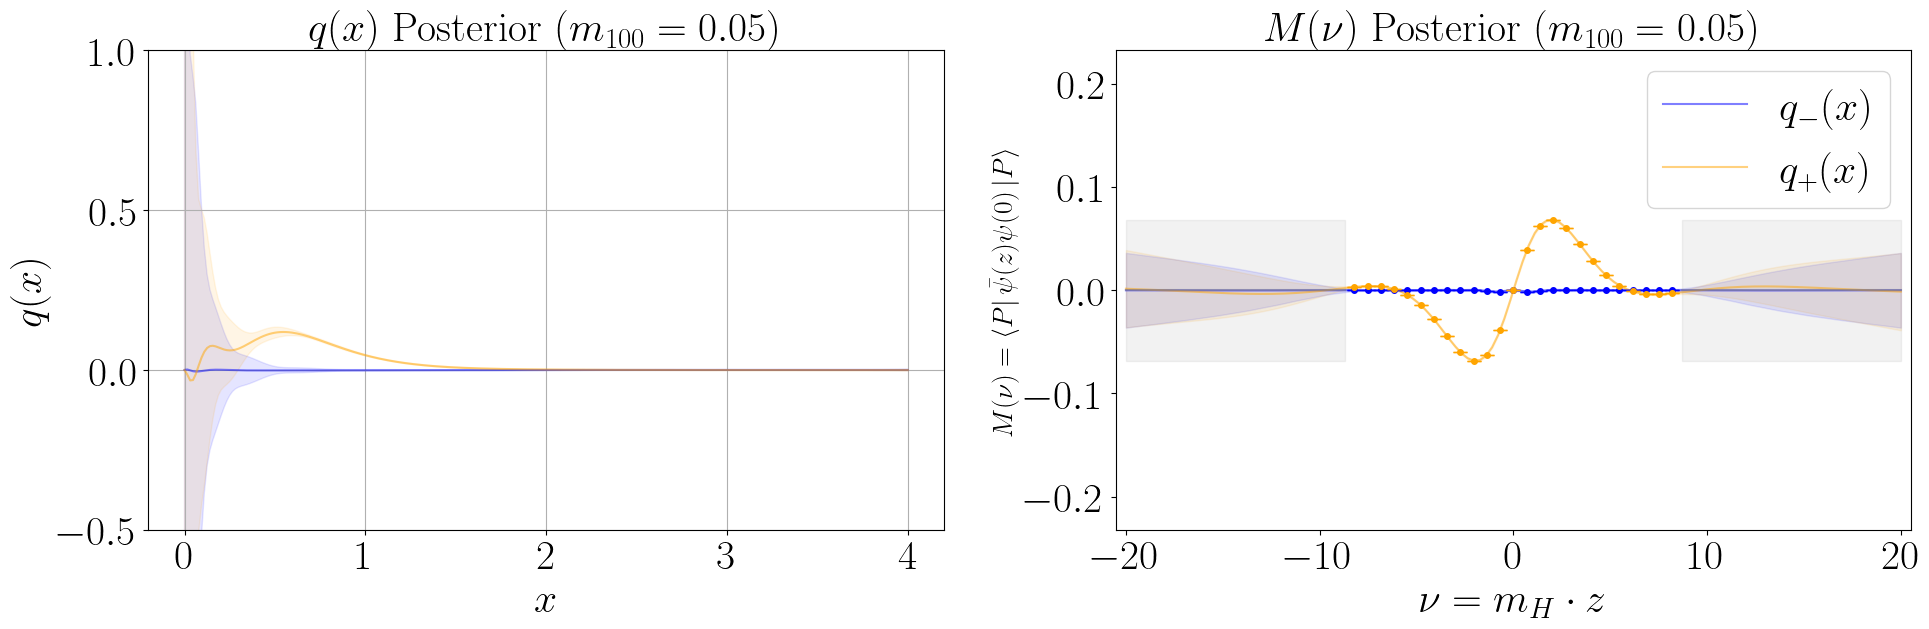

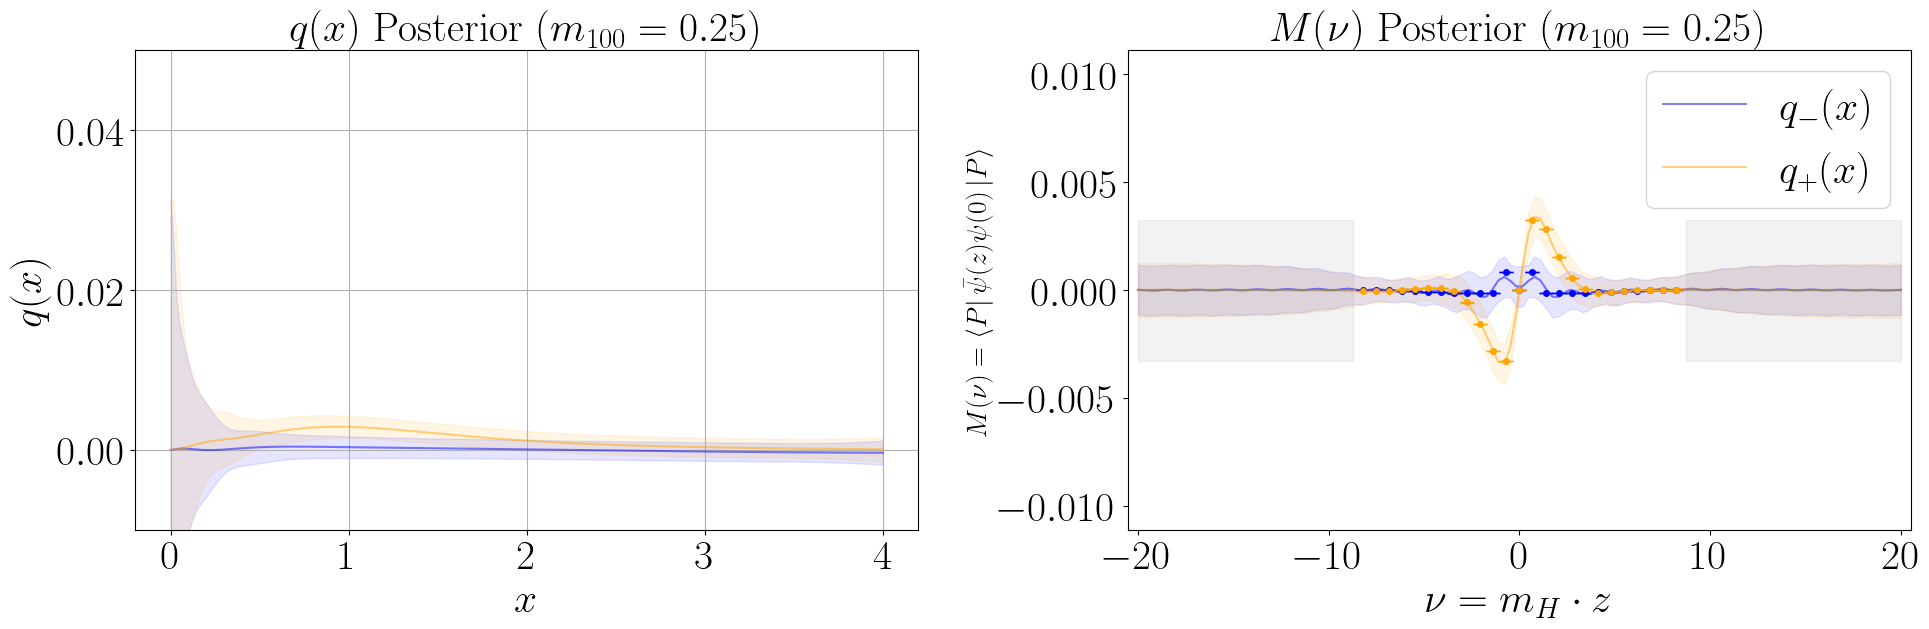

In [168]:
plot_results(model_re_005_44, model_im_005_44, x_grid, nu_theo, iBre, iBim,MH_44,z_44, data_re=m_05_Re_44, data_re_err=m_05_44_Re_err, data_im=m_05_Im_44, data_im_err=m_05_44_Im_err,name=r"$m_{44}=0.05$",init=-0.5,final=1)
plot_results(model_re_025_44, model_im_025_44, x_grid, nu_theo, iBre, iBim,MH_44,z_44, data_re=m_25_Re_44, data_re_err=m_25_44_Re_err, data_im=m_25_Im_44, data_im_err=m_25_44_Im_err,name=r"$m_{44}=0.25$",init=-0.01,final=0.05)

plot_results(model_re_005_84, model_im_005_84, x_grid, nu_theo, iBre, iBim,MH_84,z_84, data_re=m_05_84_Re, data_re_err=m_05_84_Re_err, data_im=m_05_84_Im, data_im_err=m_05_84_Im_err,name=r"$m_{84}=0.05$", init=-0.5,final=1)
plot_results(model_re_025_84, model_im_025_84, x_grid, nu_theo, iBre, iBim,MH_84,z_84, data_re=m_25_84_Re, data_re_err=m_25_84_Re_err, data_im=m_25_84_Im, data_im_err=m_25_84_Im_err,name=r"$m_{84}=0.25$", init=-0.01,final=0.05)

plot_results(model_re_005_100, model_im_005_100, x_grid, nu_theo, iBre, iBim,MH_100,z_100, data_re=m_05_100_Re, data_re_err=m_05_100_Re_err, data_im=m_05_100_Im, data_im_err=m_05_100_Im_err,name=r"$m_{100}=0.05$", init=-0.5, final=1)
plot_results(model_re_025_100, model_im_025_100, x_grid, nu_theo, iBre, iBim,MH_100,z_100, data_re=m_25_100_Re, data_re_err=m_25_100_Re_err, data_im=m_25_100_Im, data_im_err=m_25_100_Im_err,name=r"$m_{100}=0.25$", init=-0.01, final=0.05)

# PDF full

In [47]:
def PDFssample(myGP0_re, myGP0_im, x_grid, nu_theo, iBre, iBim,name,init,final):

    #replicas of imaginary and real part gaussian process with mean and covariance
    fCI = 1.0
    np.random.seed(0)
    Nsamples = 100000
    nu_theo=tr.tensor(nu_theo)

    p_re,Cp_re=myGP0_re.ComputePosterior()
    p_im,Cp_im=myGP0_im.ComputePosterior()

    Cp_re=(Cp_re+Cp_re.T)/2.0+ np.diag(np.ones_like(Cp_re.diag())*1e-6)  #add a small regularization to the covariance matrix
    Cp_im=(Cp_im+Cp_im.T)/2.0+ np.diag(np.ones_like(Cp_im.diag())*1e-6)  #add a small regular

    iB=tr.tensor(iBre)
    MM=(iB @ p_re).reshape(-1)
    covnu=iB @ Cp_re @ iB.T
    Qerror=covnu.diag().abs().sqrt()

    iB_im = tr.tensor(iBim)
    MM_im = (iB_im @ p_im).reshape(-1)
    covnu_im = iB_im @ Cp_im @ iB_im.T
    Qerror_im = covnu_im.diag().abs().sqrt()
    pdf_m= np.random.multivariate_normal(p_re, Cp_re, size=Nsamples)
    pdf_p= np.random.multivariate_normal(p_im, Cp_im, size=Nsamples)

    q=np.zeros((Nsamples, Nx))
    qb=np.zeros((Nsamples, Nx))
    for i in range(Nsamples):
        q[i]=(pdf_m[i]+ pdf_p[i])/2.0
        qb[i]=(-pdf_p[i]+ pdf_m[i])/2.0
    q_m= np.mean(q, axis=0)
    qb_m= np.mean(qb, axis=0)
    qcov= np.cov(q.T)
    qb_cov= np.cov(qb.T)

    fig, ax = plt.subplots(1, 1, figsize=(20, 9))
    ax.set_title(rf'$q(x)$ Posterior ({{{name}}})', fontsize=30)
    
    ax.plot(x_grid, q_m, color='red', alpha=0.5, label=r'$q_v(x)$')
    perr = np.sqrt(np.diag(qcov))
    ax.fill_between(x_grid, q_m - fCI * perr, q_m + fCI * perr, color='red', alpha=0.1)
    ax.plot(-x_grid, qb_m, color='green', alpha=0.5, label= r'$\bar{q}_v(x)$')
    perr_b = np.sqrt(np.diag(qb_cov))
    ax.fill_between(-x_grid, qb_m - fCI * perr_b, qb_m + fCI * perr_b, color='green', alpha=0.1)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'PDF')
    ax.set_ylim(init, final)
    #ax.set_xlim(-1.0, 1.0)
    ax.grid(True)
    ax.legend()


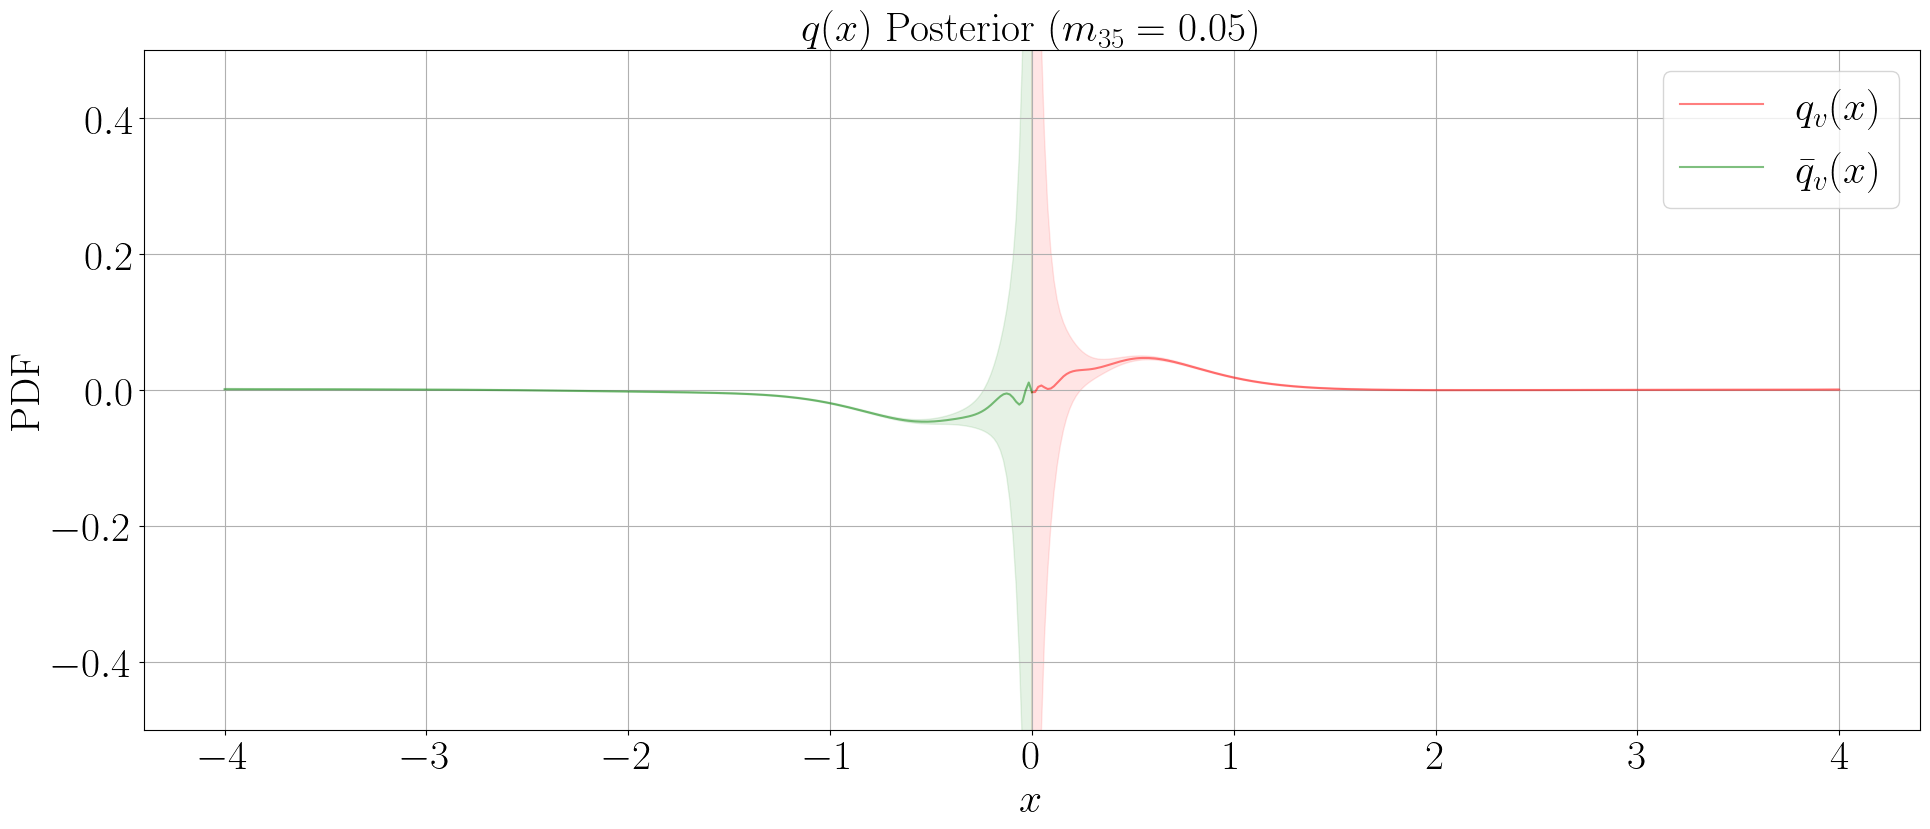

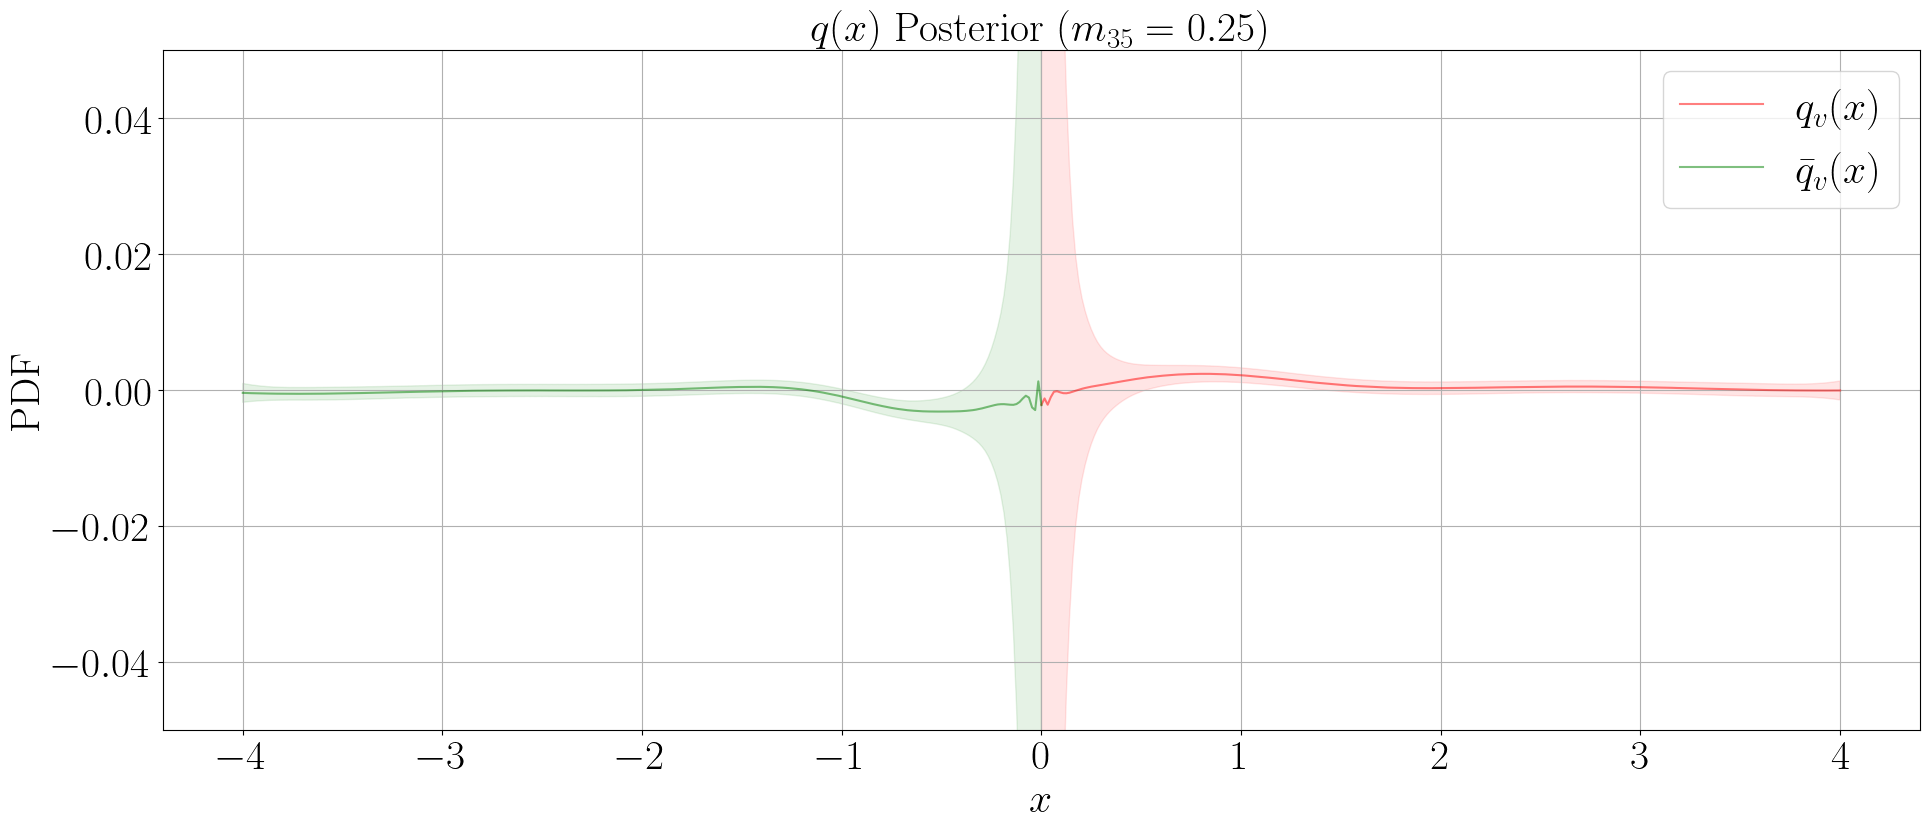

In [74]:
PDFssample(model_re_005, model_im_005, x_grid, nu_theo, iBre, iBim, name=r"$m_{35}=0.05$",init=-0.5,final=0.5)
PDFssample(model_re_025, model_im_025, x_grid, nu_theo, iBre, iBim, name=r"$m_{35}=0.25$",init=-0.05,final=0.05)

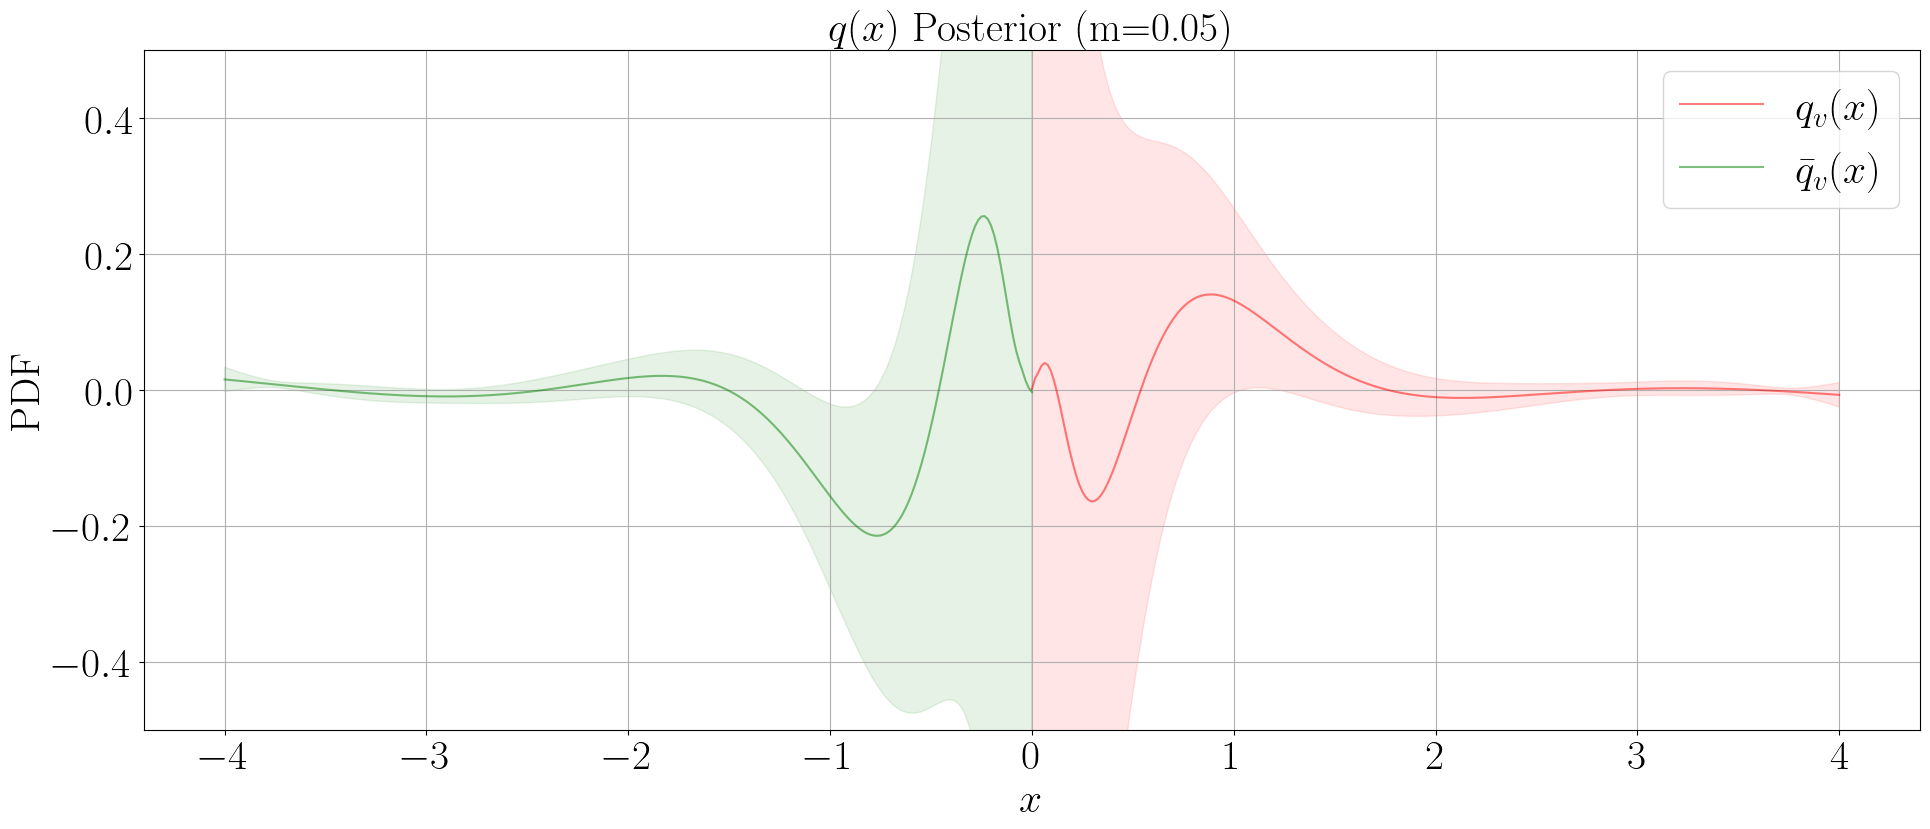

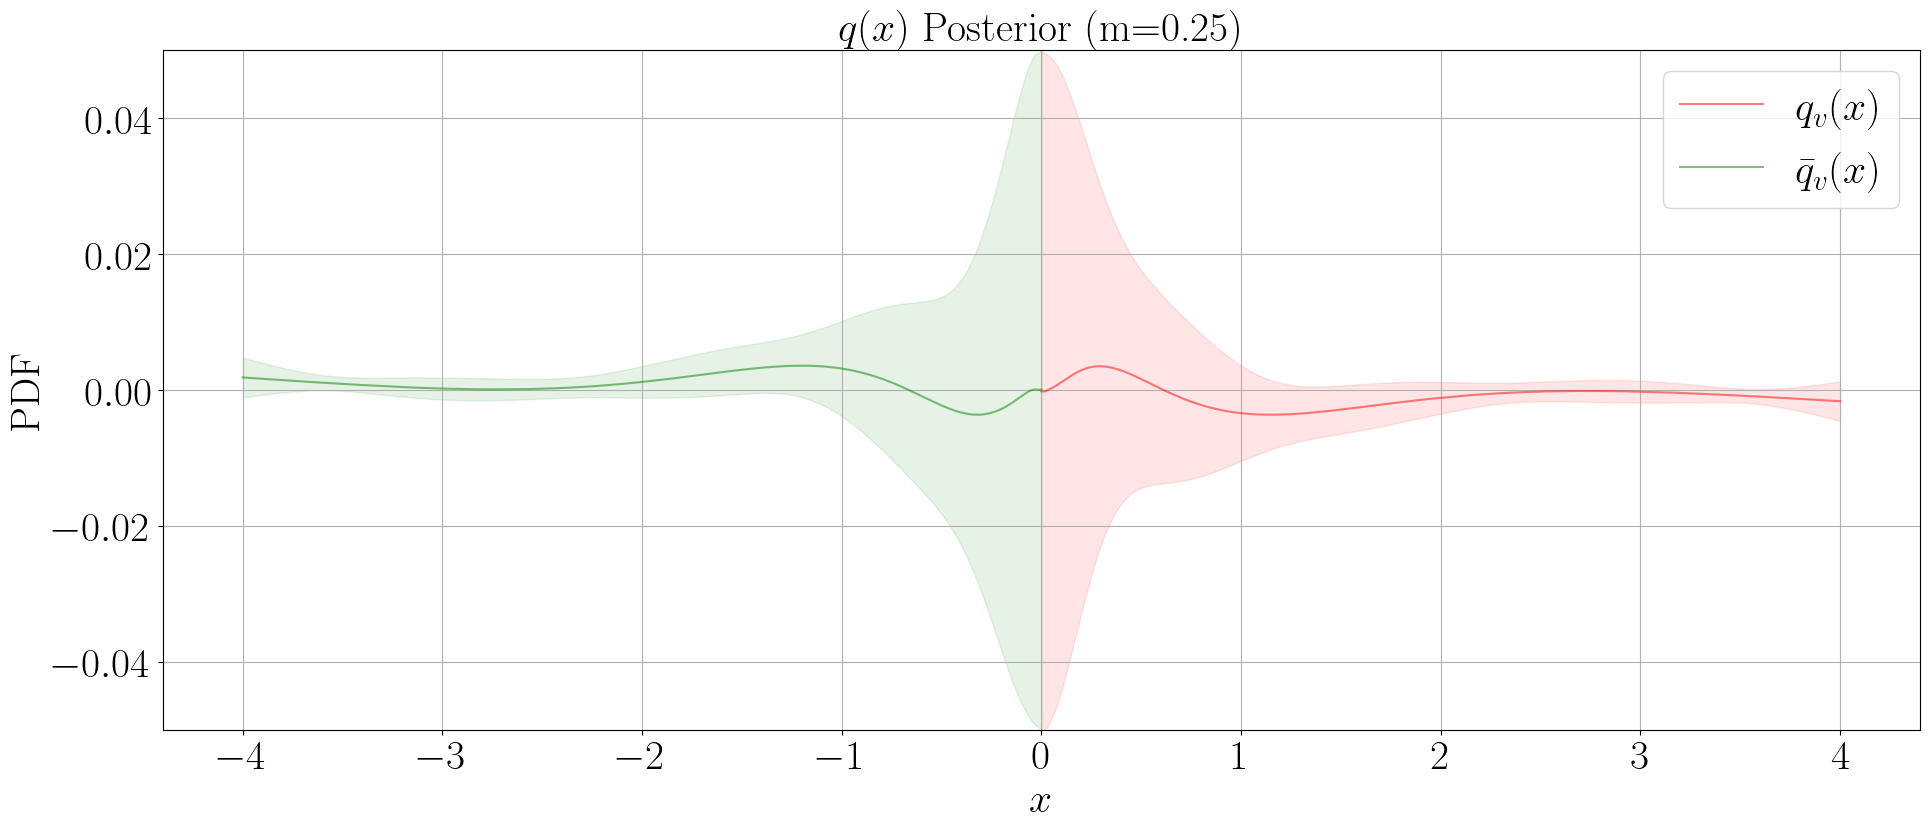

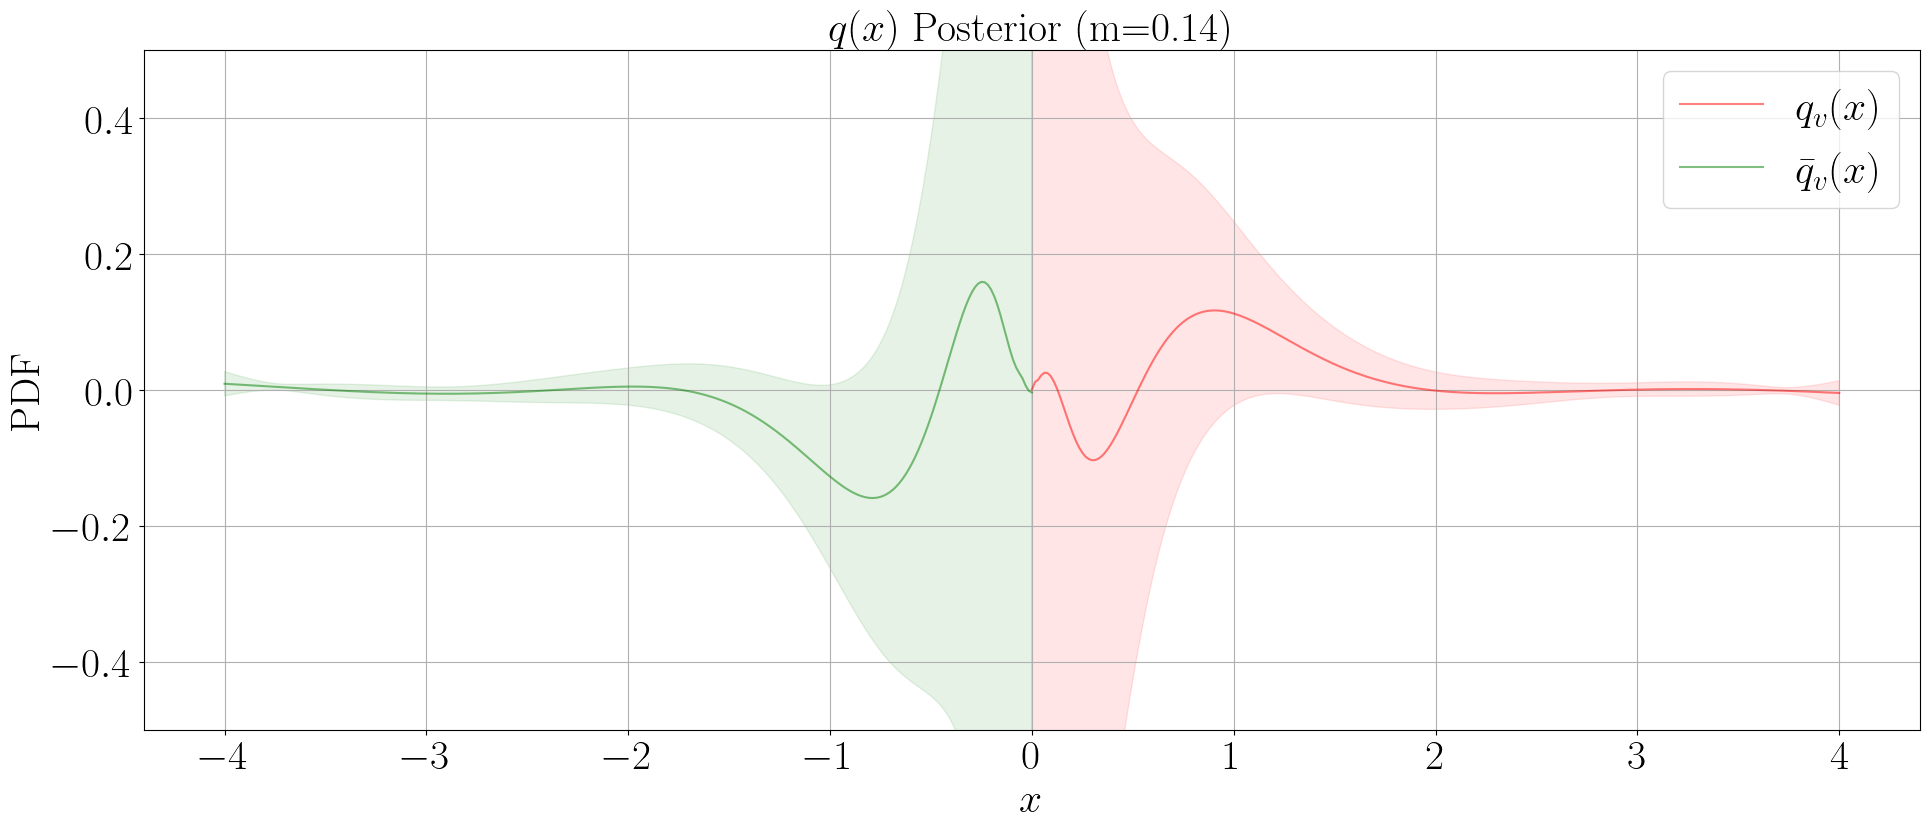

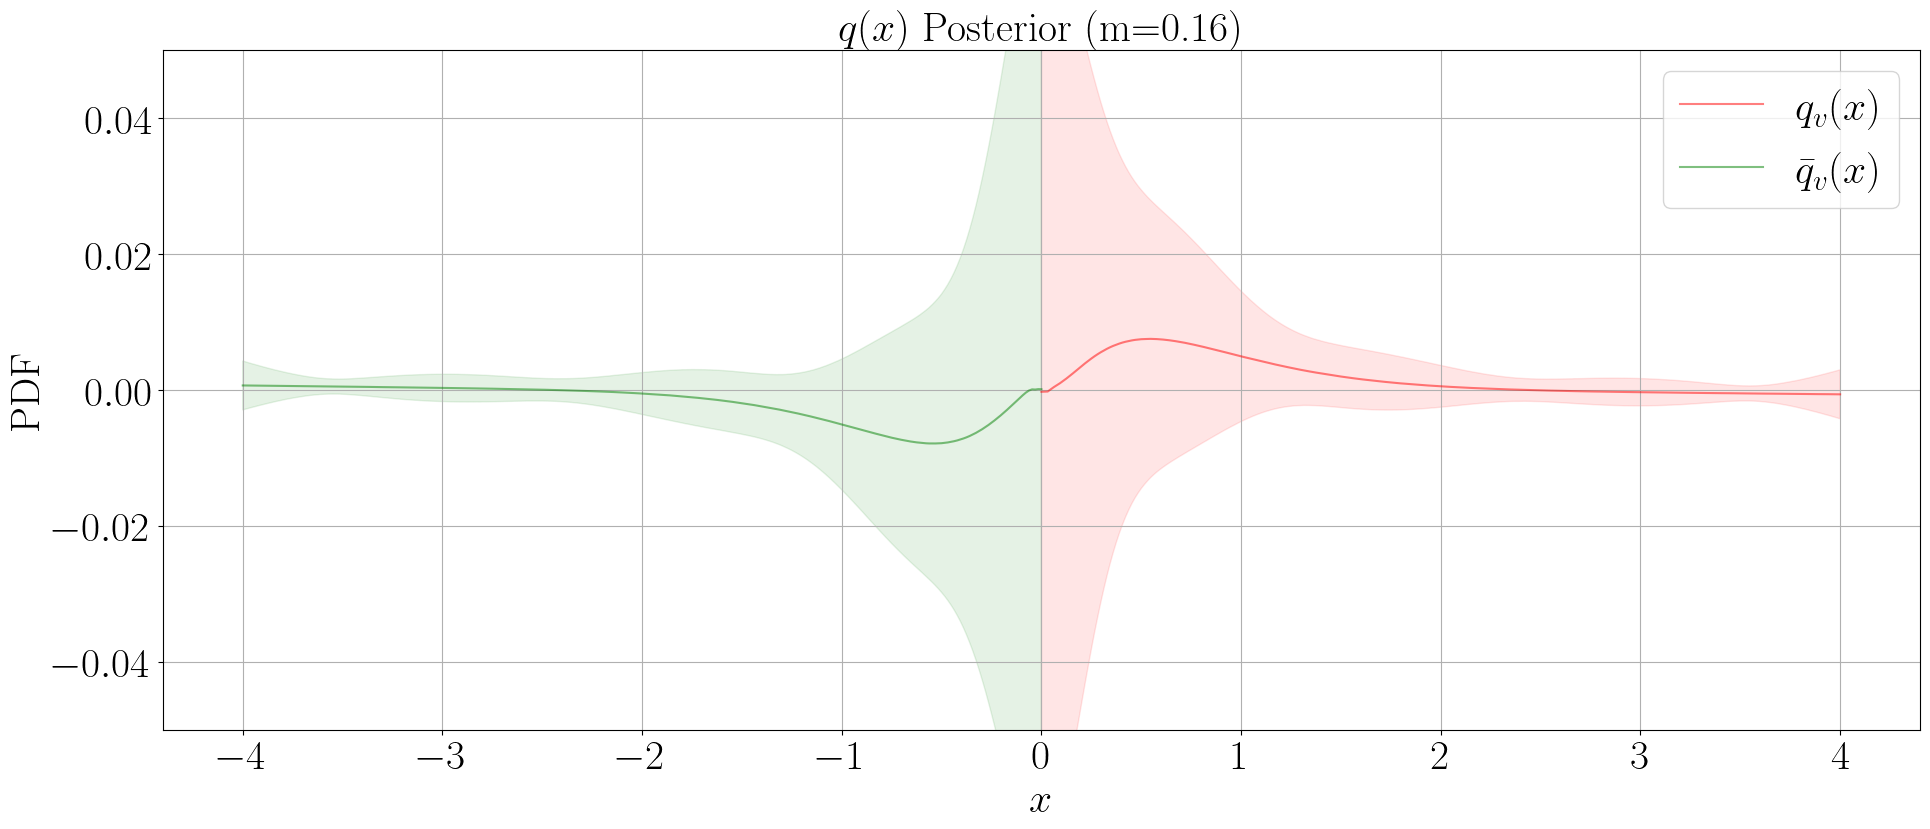

In [ ]:

PDFssample(model_re_005, model_im_005, x_grid, nu_theo, iBre, iBim, name="m=0.05",init=-0.5,final=0.5)
PDFssample(model_re_025, model_im_025, x_grid, nu_theo, iBre, iBim, name="m=0.25",init=-0.05,final=0.05)
PDFssample(model_re_014, model_im_014, x_grid, nu_theo, iBre, iBim, name="m=0.14",init=-0.5,final=0.5)
PDFssample(model_re_016, model_im_016, x_grid, nu_theo, iBre, iBim, name="m=0.16",init=-0.05,final=0.05)

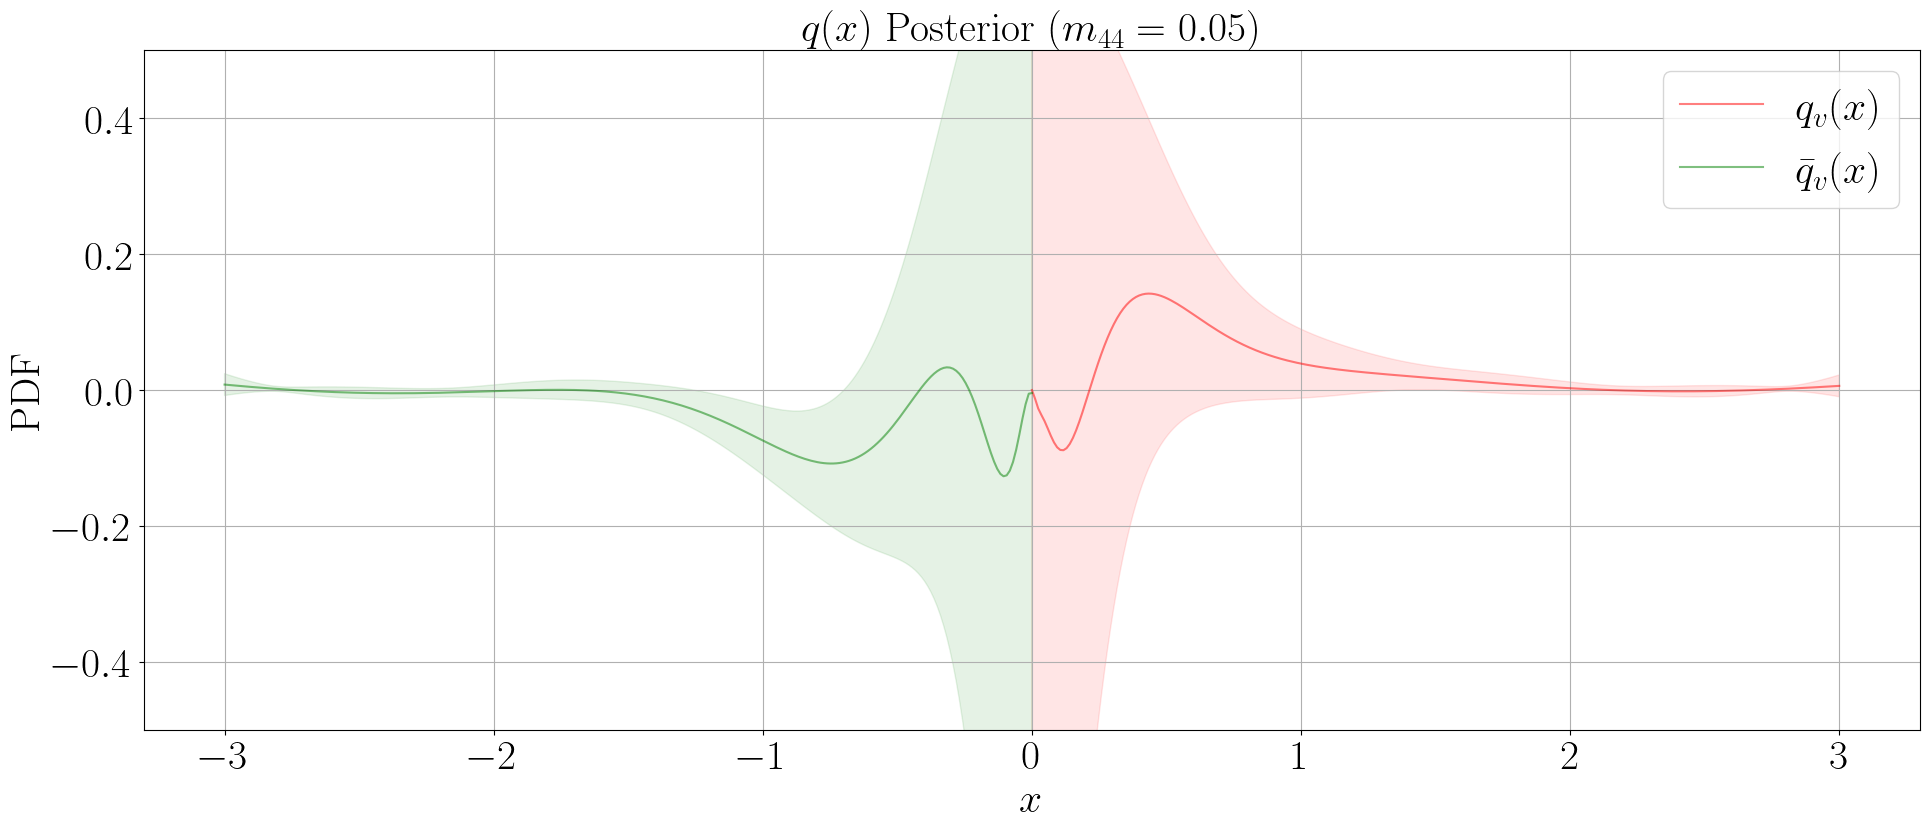

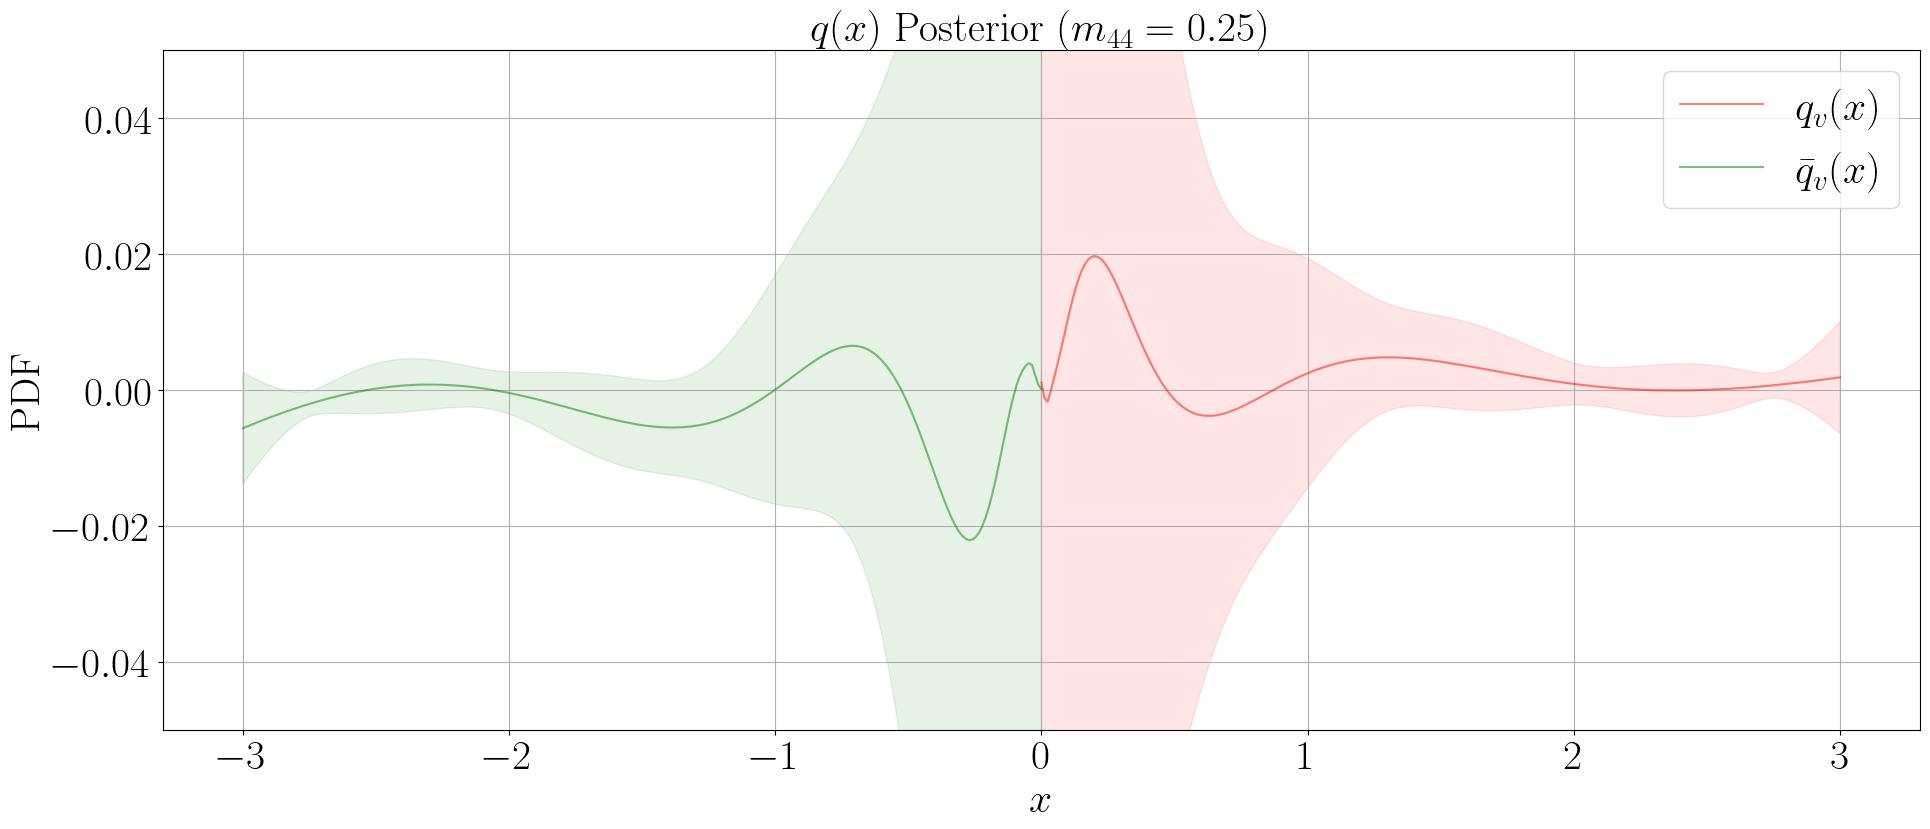

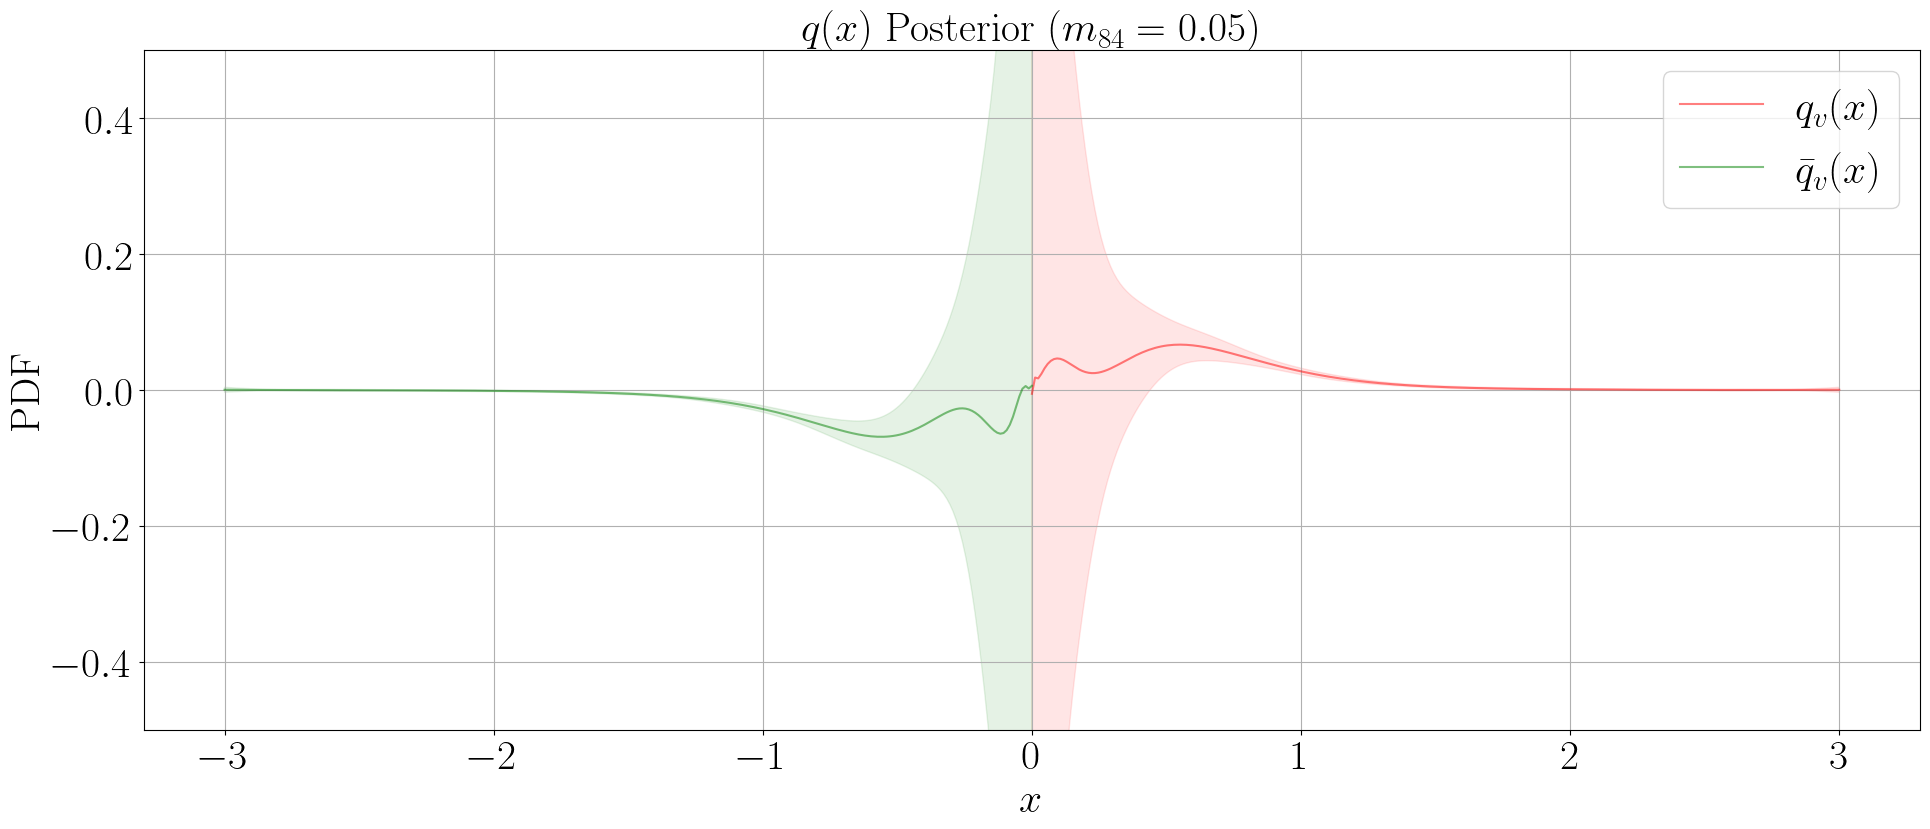

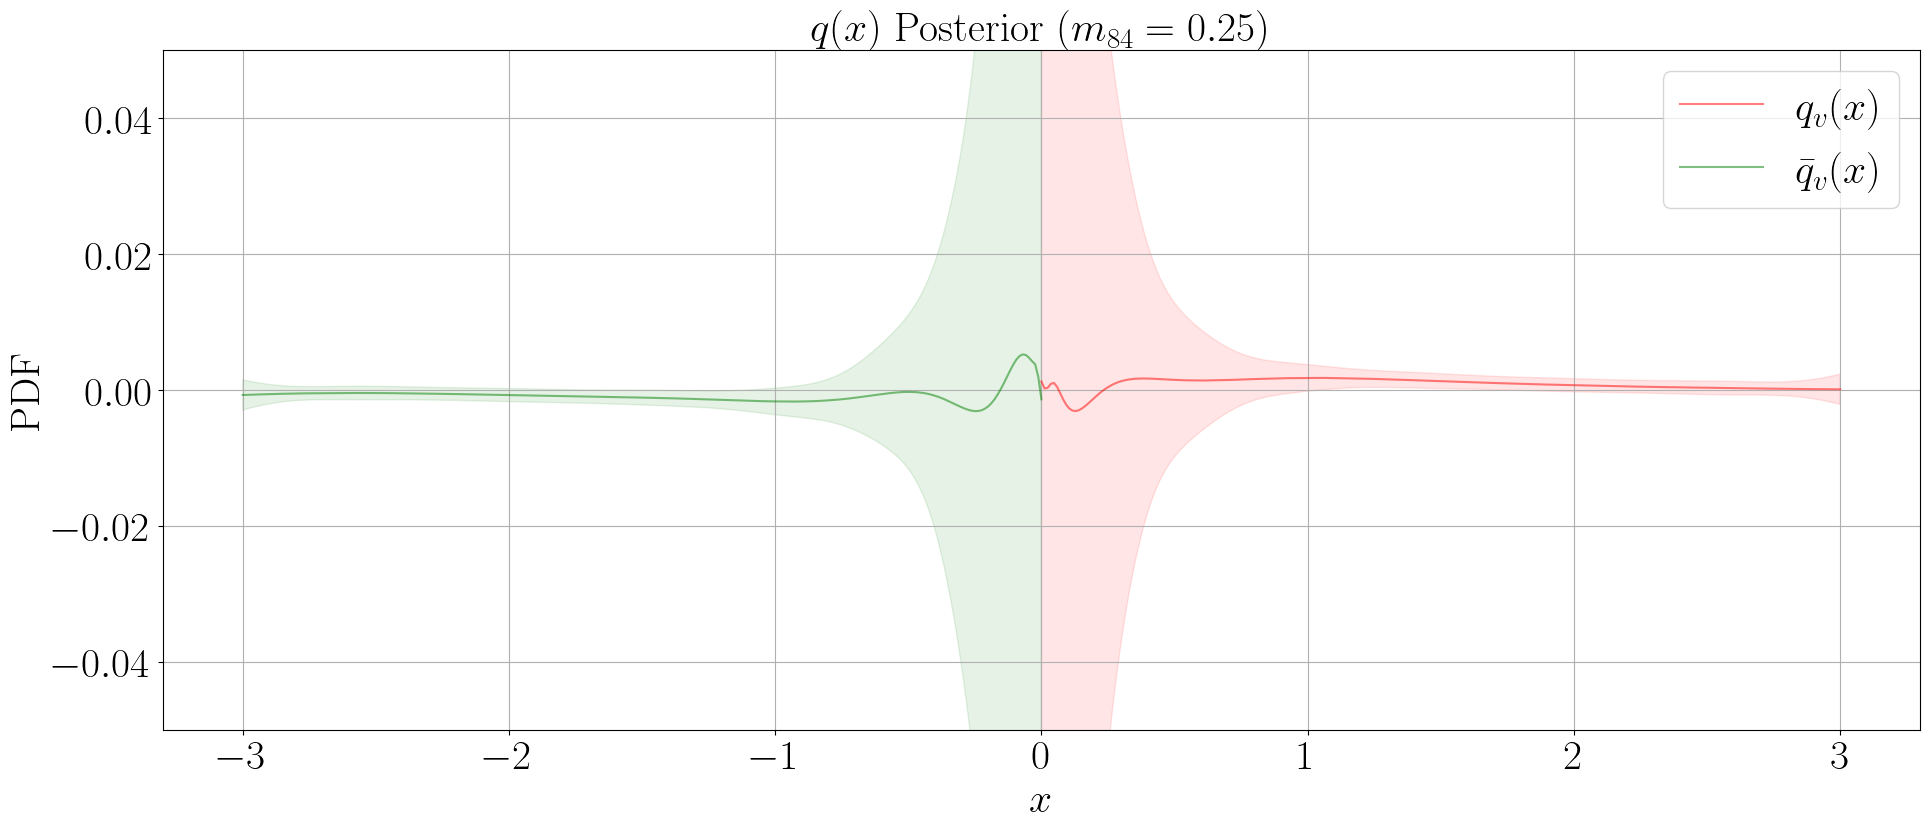

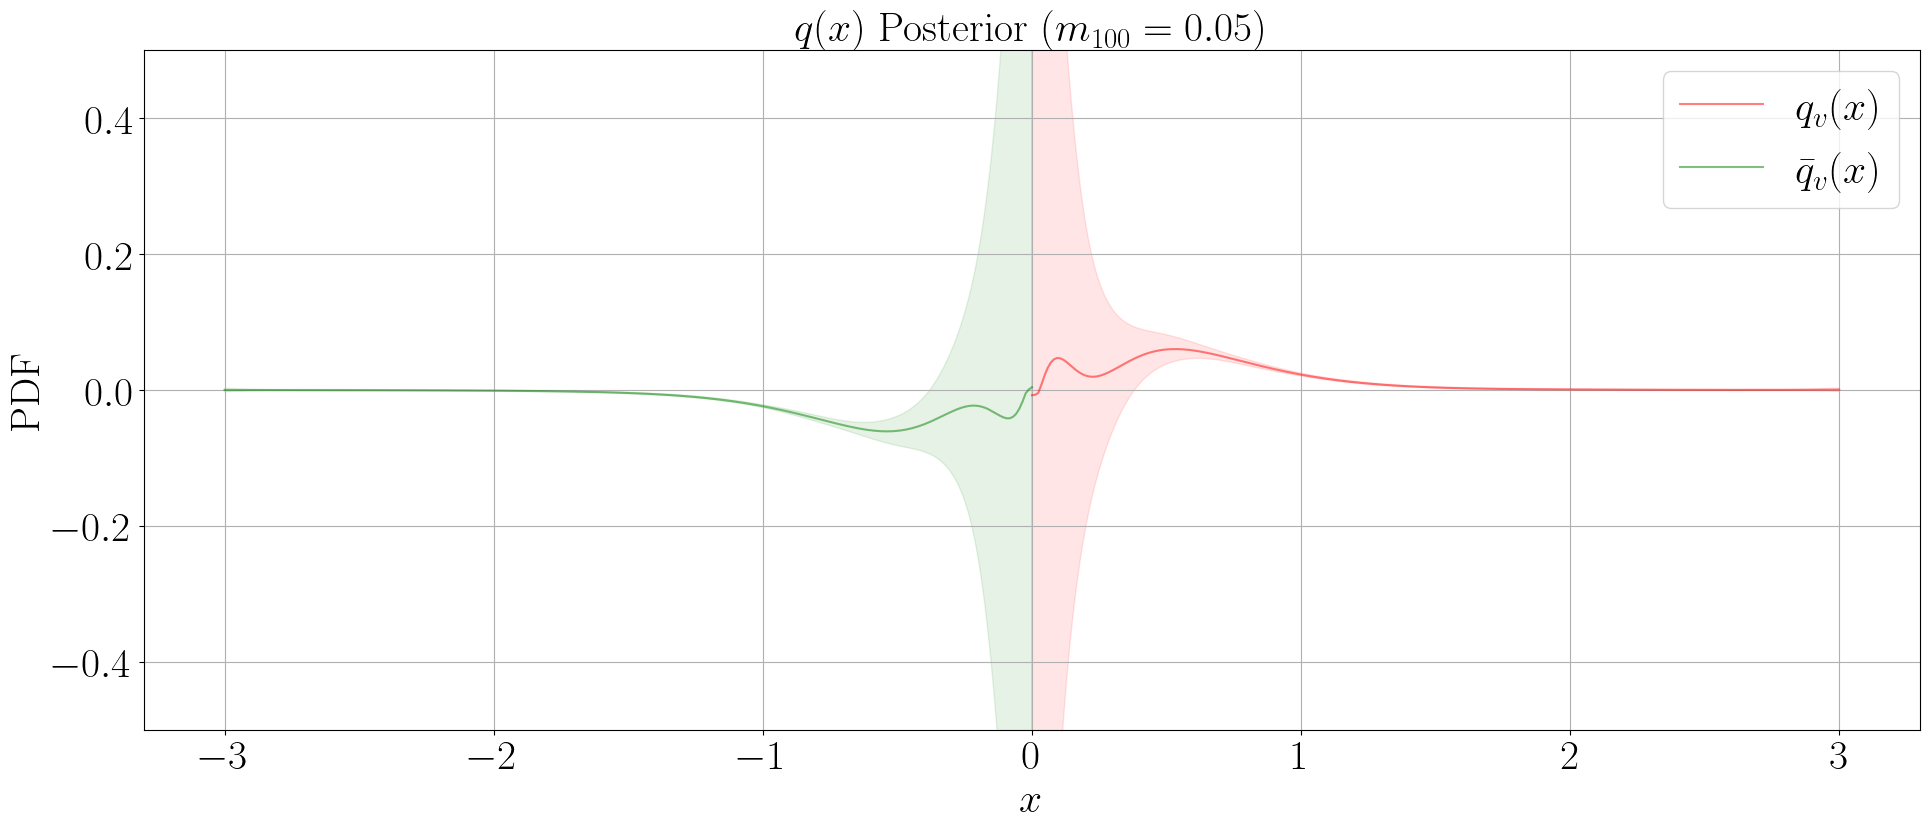

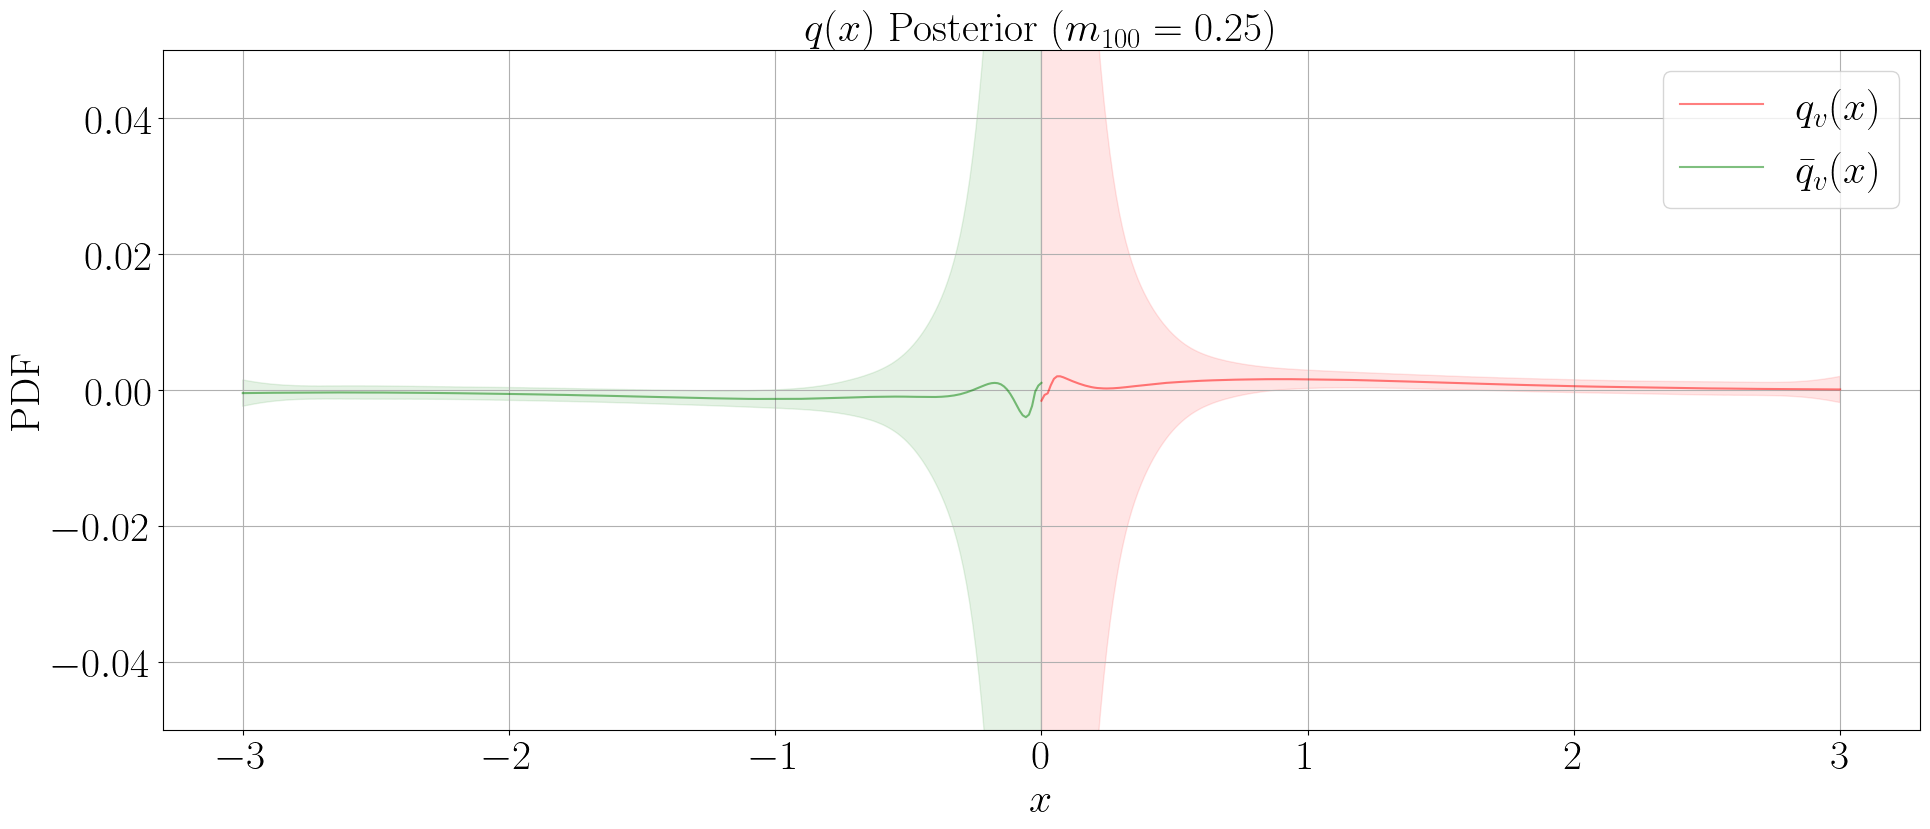

In [ ]:
PDFssample(model_re_005_44, model_im_005_44, x_grid, nu_theo, iBre, iBim, name=r"$m_{44}=0.05$",init=-0.5,final=0.5)
PDFssample(model_re_025_44, model_im_025_44, x_grid, nu_theo, iBre, iBim, name=r"$m_{44}=0.25$",init=-0.05,final=0.05)

PDFssample(model_re_005_84, model_im_005_84, x_grid, nu_theo, iBre, iBim, name=r"$m_{84}=0.05$",init=-0.5,final=0.5)
PDFssample(model_re_025_84, model_im_025_84, x_grid, nu_theo, iBre, iBim, name=r"$m_{84}=0.25$",init=-0.05,final=0.05)

PDFssample(model_re_005_100, model_im_005_100, x_grid, nu_theo, iBre, iBim, name=r"$m_{100}=0.05$",init=-0.5,final=0.5)
PDFssample(model_re_025_100, model_im_025_100, x_grid, nu_theo, iBre, iBim, name=r"$m_{100}=0.25$",init=-0.05,final=0.05)


In [ ]:
N = 44
num_flavor = 2
m1 = 0.05
m2 = 0.25
g = 0.20
hadron_data_string_1 = """
0.0017328743296496727 - 0.04714191992261476im
0.0008738129670343795 - 0.08033543278394104im
-0.006796275665850934 - 0.10025975642151286im
-0.02427610384029616 - 0.08518916998464522im
-0.07598565706763896 - 0.01566496298853542im
1.0000000037311931 - 4.606481784835982e-15im
-0.07778825064578121 + 0.014852176033741147im
-0.027655067401481173 + 0.08408080537946556im
-0.01381606814798595 + 0.09941869538848391im
-0.009295933916621573 + 0.07973932758134046im
-0.005014391212510025 + 0.04670917583650699im
"""
vacuum_data_string_1 = """
-0.003420901861782256 + 0.004402625606188255im
-0.0049458992973189725 + 0.009548009674816995im
-0.010306459925746757 + 0.018348096754835425im
-0.02530714582787019 + 0.034714208671530286im
-0.07401516408501939 + 0.062184634223946864im
1.0000000000593052 - 2.1864208619499943e-12im
-0.07388908562330179 - 0.062169138889899195im
-0.02484125473383012 - 0.034826233109765244im
-0.009559242092866925 - 0.018277875192697496im
-0.0033966078548476014 - 0.009507415675467113im
6.202430780438895e-5 - 0.00442366549153132im
"""
hadron_data_string_2 = """
-0.002132529644314081 + 0.00137350065211243im
-0.003784006447201175 + 0.0035169074744073937im
-0.008888553500113618 + 0.007656714735888834im
-0.023218242734813863 + 0.017992145889582863im
-0.07187062255039857 + 0.042343492236786656im
1.000000001808198 - 1.90523266503006e-12im
-0.07319090040580646 - 0.04339375866819526im
-0.0243032254497367 - 0.01921502233839867im
-0.009829261678033614 - 0.008668226454486208im
-0.003796875270820845 - 0.004181220737014008im
-0.0007462651039639918 - 0.0018409533688198269im
"""
vacuum_data_string_2 = """
-0.00199394252832593 + 0.001983587454897245im
-0.003723077128796966 + 0.005151571898650898im
-0.008988068296018 + 0.011402709479417836im
-0.02395620377126334 + 0.02474457371742366im
-0.07409411926767775 + 0.05045179766130324im
0.9999999997361859 - 1.7511507763573968e-12im
-0.07405850832999941 - 0.05046244941178825im
-0.023795793978993403 - 0.02467955723837901im
-0.008864909639549197 - 0.011454113275482885im
-0.003290795533780884 - 0.005191357293548638im
-0.0006453513279805851 - 0.0020763627969756482im
"""
M_h = 0.6904856604909035

In [2]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from scipy import integrate as integrate
from scipy.integrate import simpson as Simpsons_Rule
from scipy.integrate import trapezoid as Trapezoidal_Rule


import re

# data cleaning
def complex_conversion(array_str):
    """
    Converts array which has values in julia complex format e.g. 1 + 1im
    This function converts the values to 1 + 1*1j
    array_str is string version of our array
    """
    # Replace 'im' with '*1j'
    corrected_array_str = array_str.replace('im', '*1j')

    # Evaluate the corrected string to get the array
    corrected_array = eval(corrected_array_str)

    return corrected_array

def multi_line_complex_conversion(data):
    """
    Converts a multiline string of complex numbers in Julia format to a Python list of complex numbers.
    """

    complex_list = []
    for line in data.strip().split("\n"):
        # Replace "im" with "j" and remove extra spaces
        line = line.replace("im", "j").strip()
        
        # Ensure Python-style complex formatting
        line = re.sub(r'([\d\.e\-\+]+) \+ ([\d\.e\-\+]+)j', r'\1+\2j', line)
        line = re.sub(r'([\d\.e\-\+]+) \- ([\d\.e\-\+]+)j', r'\1-\2j', line)

        # Convert to complex
        complex_list.append(complex(line))

    return complex_list


def Momentum_PDF_integrand(z_smooth, D_smooth, x, Mh):
    """
    Helper function to implement equation (2), (5) of 2106.03865
    For a given x, this function returns the array of possible integrands for the various (continuous) z vals

    D_smooth is D(z) but with continuous interpolation filling in values in between the z's
    z_smooth are the corresponding z's used in D_smooth
    """
    integrand_array = []

    for index in range(len(z_smooth)):
        z = z_smooth[index]
        integrand = (1/(4*np.pi))*np.exp(-1j*x*Mh*z)*D_smooth[index]
        integrand_array.append(integrand)
    return integrand_array

def obtain_f_array_Fourier_Simpsons(x_array, z_smooth, D_smooth, Mh):
    """
    Continuous fourier transform based on equation (2) of 2106.03865
    We use Simpson's rule to numerically compute the integral
    """
    f_array = []
    dz = z_smooth[1] - z_smooth[0]
    for x in x_array:
        integrand_array = Momentum_PDF_integrand(z_smooth, D_smooth, x, Mh)
        integral = Simpsons_Rule(y = integrand_array, x = z_smooth, dx = dz)
        f_array.append(integral)
    return f_array

def normalization_constant(x_array, f_q_array):
    """
    We enforce that the (numerical) integral on the positive region of function x*f_q(x) = 1/2
    We also may need to compute |A| so that it is a real value?
    """
    if len(x_array) != len(f_q_array):
        raise ValueError("x_array and f_q_array not same length")
    
    # look at positive x region and corresponding f vals
    pos_x_array = x_array[int(len(x_array)/2):]
    pos_f_q_array = f_q_array[int(len(x_array)/2):]

    # numerically compute the integral int x*f_q(x)dx
    int_sum = Simpsons_Rule(y = np.array(pos_f_q_array)*np.array(pos_x_array), x = pos_x_array)
    # int_sum = Simpsons_Rule(y = np.array(pos_f_q_array), x = pos_x_array)

    A = 1/2/int_sum # normalization constant
    # A = np.sqrt(np.conj(A)*A)
    return A

def discrete_fourier_transform(x_array, z_array, D_z_array, Mh):
    "implement (5)"
    f_q_array = []
    for x in x_array:
        res = 0
        for index in range(len(z_array)):
            res += np.exp(-1j*x*Mh*z_array[index])*D_z_array[index]/(np.sqrt(4*np.pi))
        f_q_array.append(res)
    return f_q_array

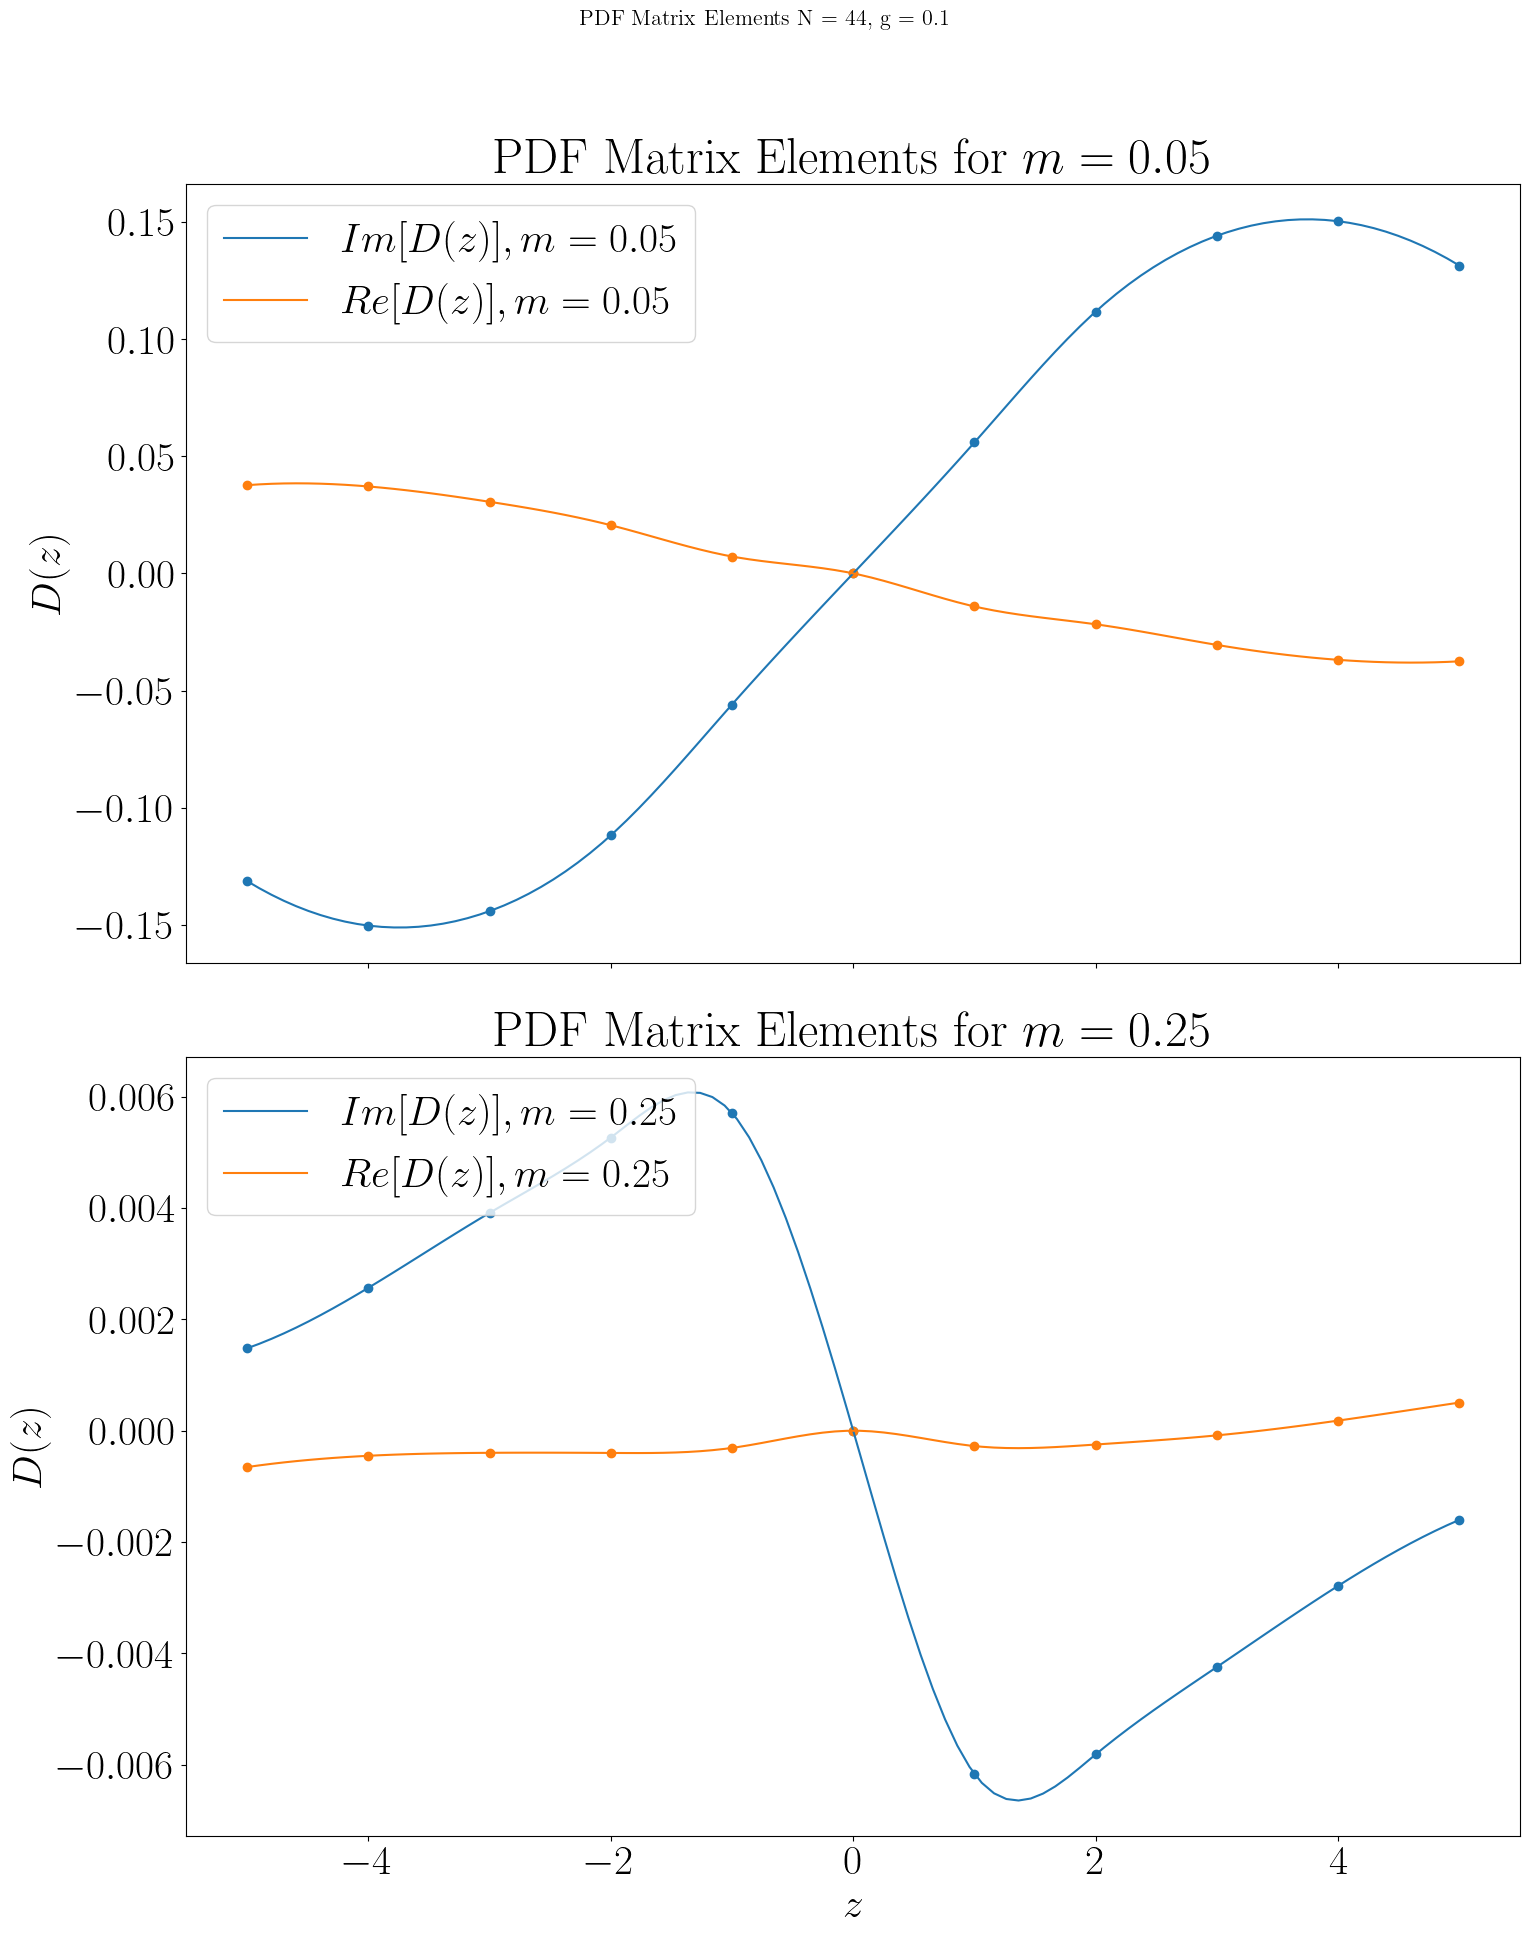

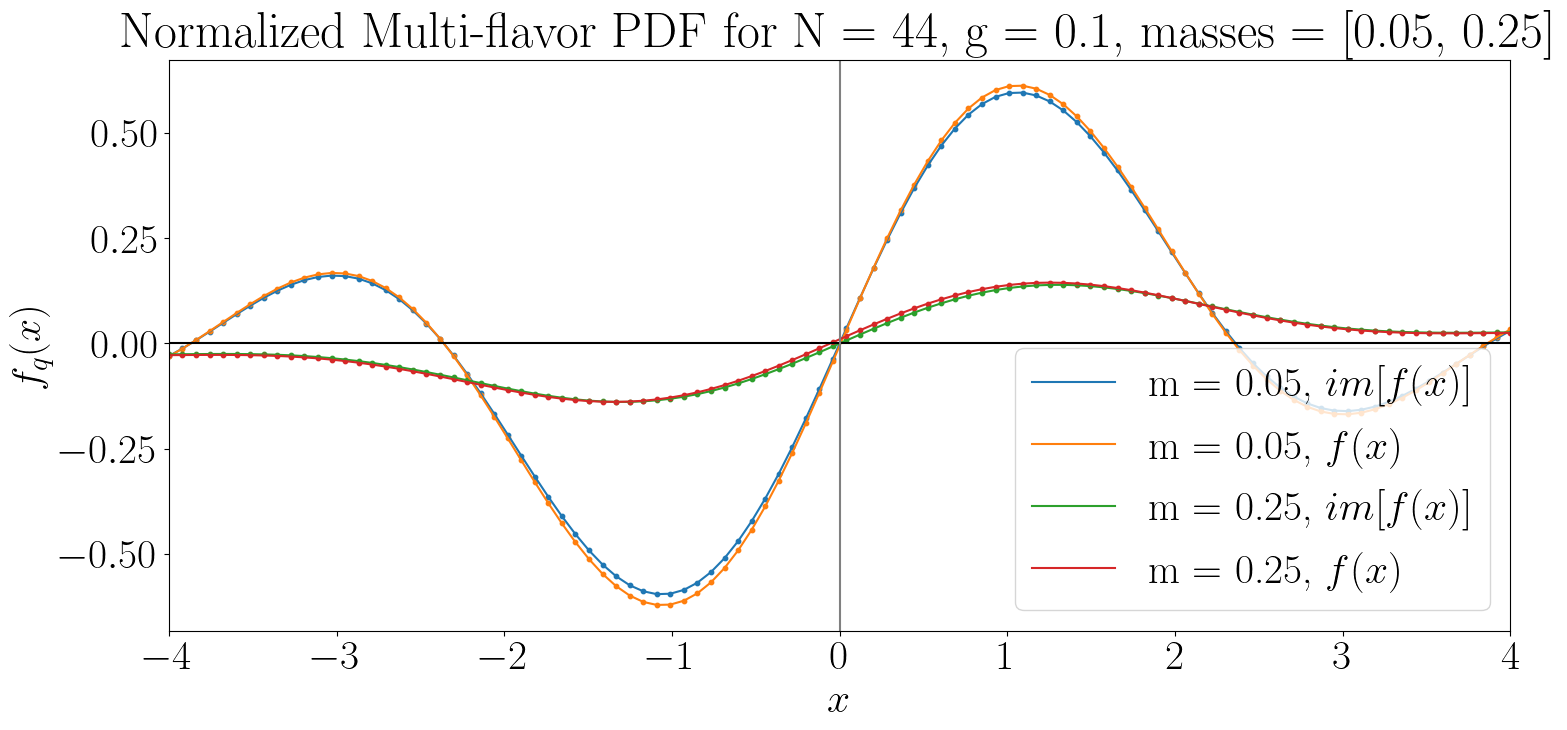

In [5]:
## DATA SECTION
N = 44
num_flavor = 2
num_sites = N/num_flavor/2

data_hadron_dict_mass = {}
data_vacuum_dict_mass = {}
M_h_dict = {} # dict of hadron masses

# data for first flavor
m1 = 0.05
data_hadron_dict_mass[m1] = """
0.028521249919940515 - 0.11589402649724176im
0.028118386362967544 - 0.12409381790952392im
0.016315264247183735 - 0.10136189078343505im
-0.01203708097015009 - 0.041145331116670215im
-0.08920217584509132 + 0.05927402512168346im
0.9999999999521987 - 1.404841271799671e-13im
-0.10910114142920108 - 0.059360005488150715im
-0.051185974453233994 + 0.04101361545748661im
-0.03940152703433449 + 0.1013259921507291im
-0.03698728255349264 + 0.12404650364727543im
-0.03192651813317623 + 0.1158490094321199im
"""
data_vacuum_dict_mass[m1] = """
-0.009129741226795239 + 0.01545188187000334im
-0.008984638458353685 + 0.02625642827093974im
-0.01424009935775223 + 0.04282481143137387im
-0.032604993392460084 + 0.07069491380980385im
-0.0964061610444549 + 0.11525484356109911im
0.9999999999931529 - 1.620124474483324e-12im
-0.09497551589136163 - 0.11526665419855582im
-0.029455184188965446 - 0.0707465530254072im
-0.00886016297601568 - 0.042799293724383874im
-8.027501718814618e-5 - 0.026284526374285806im
0.00561471972918904 - 0.015542401646727717im
"""
# hadron mass is = 0.4170251259201194
# E0 is = -16.53283344198838
# E1 is = -16.11580831606826
# dot product between ground and hadron state: 2.9886818627561373e-10 - 1.5895256716297878e-16im
# a = 1.0
# g = 0.1
# m = [0.05, 0.25]
# lattice condition satisfied
M_h_dict[m1] = 0.4170251259201194

# data for second flavor
m2 = 0.25
data_hadron_dict_mass[m2] = """
-0.004515141007123328 + 0.00751031434825877im
-0.0055254286535342464 + 0.015663070220909864im
-0.011611157400513033 + 0.02980417334852159im
-0.03063576146093968 + 0.056092563281796154im
-0.09598627730845581 + 0.10255773593414802im
0.9999999999893923 - 1.7388651719627587e-12im
-0.09577020759258953 - 0.10301579934877544im
-0.03001294507090376 - 0.056637016934925906im
-0.010380570410945462 - 0.030153364844127853im
-0.0028386479822794857 - 0.015886495881730276im
0.0013861968682561212 - 0.007669687144921802im
"""
data_vacuum_dict_mass[m2] = """
-0.003862167312904144 + 0.006031436125174825im
-0.005074723233791236 + 0.013098298937749464im
-0.01121389116440432 + 0.02589395190203333im
-0.030236191487620107 + 0.05083001406472561im
-0.09567707599227959 + 0.09685292289820732im
0.9999999999910995 - 2.0691841710056053e-12im
-0.09549386595914307 - 0.09685166469505199im
-0.029764553110072294 - 0.05082497214731675im
-0.010296641022558105 - 0.02591105606108598im
-0.003019715102284671 - 0.013100817712163464im
0.0008814972606429354 - 0.006069063959785139im
"""
# hadron mass is = 0.4170251259201194
# E0 is = -16.53283344198838
# E1 is = -16.11580831606826
# dot product between ground and hadron state: 2.9886818627561373e-10 - 1.5895256716297878e-16im
# a = 1.0
# g = 0.1
# m = [0.05, 0.25]
# lattice condition satisfied
M_h_dict[m2] = 0.4170251259201194

## MATRIX ELEMENTS PLOTTING SECTION

Matrix_elements_dict = {} # dict of matrix elements values for different flavors
m_array = [m1, m2]
g = 0.10

z_max = int((num_sites-1)/2)
z_array = np.linspace(-z_max, z_max, num = 2*z_max + 1, endpoint=True, dtype = int)
Matrix_elements_dict[m1] = np.array(multi_line_complex_conversion(data_hadron_dict_mass[m1])) - np.array(multi_line_complex_conversion(data_vacuum_dict_mass[m1]))

Matrix_elements_dict[m2] = np.array(multi_line_complex_conversion(data_hadron_dict_mass[m2])) - np.array(multi_line_complex_conversion(data_vacuum_dict_mass[m2]))

# Create subplots of matrix elements
num_m = len(m_array)
fig, axs = plt.subplots(num_m, 1, figsize=(16, 10 * num_m), sharex=True)

# If there's only one subplot, wrap it in a list for uniform indexing
if num_m == 1:
    axs = [axs]

# Dictionaries for cubic spline real/imag parts of interpolation data
C_spline_Re_dict = {}
C_spline_Im_dict = {}

z_smooth = np.linspace(z_array.min(), z_array.max(), 100) # populate intermediary z values for interpolation
for i, m in enumerate(m_array):
    ax = axs[i]

    # perform cubic spline interpolation on real/imag parts of the matrix elements
    C_spline_Re_dict[m] = CubicSpline(z_array, np.real(Matrix_elements_dict[m]))
    C_spline_Im_dict[m] = CubicSpline(z_array, np.imag(Matrix_elements_dict[m]))

    # Plot imaginary part
    ax.plot(z_smooth, C_spline_Im_dict[m](z_smooth), label = fr"$Im[D(z)], m = {m}$")
    current_color = ax.lines[-1].get_color()
    ax.scatter(z_array, np.imag(Matrix_elements_dict[m]), color = current_color)

    # Plot real part
    ax.plot(z_smooth, C_spline_Re_dict[m](z_smooth), label = fr"$Re[D(z)], m = {m}$")
    current_color = ax.lines[-1].get_color()
    ax.scatter(z_array, np.real(Matrix_elements_dict[m]), color = current_color)

    ax.set_ylabel(r"$D(z)$")
    ax.set_title(fr"PDF Matrix Elements for $m = {m}$")
    ax.legend(loc='upper left')

axs[-1].set_xlabel(r"$z$")
fig.suptitle(f"PDF Matrix Elements N = {N}, g = {g}", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# PDF PLOTTING SECTION
x_array = np.linspace(-4, 4, 100)

plt.subplots(1, 1, figsize=(16, 8))
for m in m_array:

    cubic_spline_im = 1j*np.array(C_spline_Im_dict[m](z_smooth)) # add imaginary factor i to the imag part of matrix elements
    momentum_pdf_im = np.array(obtain_f_array_Fourier_Simpsons(x_array, z_smooth, cubic_spline_im, M_h_dict[m])) # perform continuous Fourier transform to obtain f(x)

    cubic_spline_re = np.array(C_spline_Re_dict[m](z_smooth)) # real part of matrix elements
    momentum_pdf_re = np.array(obtain_f_array_Fourier_Simpsons(x_array, z_smooth, cubic_spline_re, M_h_dict[m])) # perform continuous Fourier transform to obtain f(x)

    # plot Im[f(x)]. theoretically Re[f(x)] = 0
    A_im = normalization_constant(x_array, momentum_pdf_im) # normalization constant
    plt.plot(x_array, A_im*(momentum_pdf_im), label = fr"m = {m}, $im[f(x)]$")
    current_color = plt.gca().lines[-1].get_color()
    plt.scatter(x_array, A_im*(momentum_pdf_im), s = 10)

    # plot full f(x)
    A_full = normalization_constant(x_array, momentum_pdf_re + momentum_pdf_im)
    plt.plot(x_array, A_full*(momentum_pdf_re + momentum_pdf_im), label = fr"m = {m}, $f(x)$")
    current_color = plt.gca().lines[-1].get_color()
    plt.scatter(x_array, A_full*(momentum_pdf_re + momentum_pdf_im), s = 10)
    
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='grey')
plt.xlabel(r"$x$")
plt.ylabel(r"$f_q(x)$")
plt.xlim((np.min(x_array), np.max(x_array)))
# plt.ylim(top=1)
plt.title(f"Normalized Multi-flavor PDF for N = {N}, g = {g}, masses = {m_array}")
plt.legend()